In [2]:
from keras.layers import Input, Dense
from keras.models import Model, load_model
from keras import backend as K
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import seaborn as sns
from keras.callbacks import *
from keras import regularizers
from keras import optimizers
# sklearn
from sklearn.model_selection import train_test_split
# from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, auc, precision_score, recall_score
from sklearn.preprocessing import MinMaxScaler

# other
import time

In [3]:
# load training dataset
data_path = "./data/"
df_train_orig = pd.read_csv(data_path + "dataset03.csv", parse_dates = ['DATETIME'], dayfirst=True)

In [4]:
df_train_orig

,DATETIME,L_T1,L_T2,L_T3,L_T4,L_T5,L_T6,L_T7,F_PU1,S_PU1,...,P_J256,P_J289,P_J415,P_J302,P_J306,P_J307,P_J317,P_J14,P_J422,ATT_FLAG
0,2014-01-06 00:00:00,0.509730,2.049003,3.191145,2.792634,2.656091,5.316831,1.562321,98.998444,1,...,87.605774,26.495605,84.206619,18.901676,81.983734,18.791777,67.125603,29.387470,28.487471,0
1,2014-01-06 01:00:00,0.412580,2.009072,3.642565,2.831673,3.126387,5.494855,1.852043,99.095901,1,...,89.448341,26.487326,85.900085,18.849329,82.150589,18.739643,67.178696,29.354256,28.454256,0
2,2014-01-06 02:00:00,0.320112,1.986093,4.140192,3.256733,3.574601,5.500000,2.246126,98.420959,1,...,91.056114,26.487364,86.582474,19.597170,83.988579,19.496712,72.425293,29.354538,28.454538,0
3,2014-01-06 03:00:00,0.332879,2.009203,4.673478,3.744497,3.952379,5.500000,3.203573,97.575172,1,...,92.594353,26.575815,88.020546,26.028486,64.670486,25.922703,76.275040,29.449951,28.549952,0
4,2014-01-06 04:00:00,0.483496,2.089049,5.237937,4.409456,3.504676,5.500000,4.439714,97.351059,1,...,94.473099,26.723457,90.422462,26.209970,64.746620,26.104692,76.703529,29.574265,28.674263,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8756,2015-01-05 20:00:00,3.349998,3.393529,3.704372,3.318569,1.976920,5.500000,4.797106,96.594833,1,...,71.224411,28.940384,84.560669,21.076448,81.414070,20.970821,71.399384,31.532953,30.632954,0
8757,2015-01-05 21:00:00,3.262380,3.738153,3.319207,3.162533,2.355615,5.207708,3.493474,96.445862,1,...,69.354080,29.247887,84.673790,26.999941,83.265991,26.999941,52.213036,31.836996,30.936996,0
8758,2015-01-05 22:00:00,3.114685,3.948144,3.123156,3.060679,2.593729,4.997561,2.207609,96.929070,1,...,86.823753,28.358240,84.593727,20.571791,81.679344,20.457272,66.498741,31.281141,30.381142,0
8759,2015-01-05 23:00:00,2.931601,3.892631,3.542954,3.025374,2.923712,5.104730,2.071863,97.206474,1,...,87.819832,28.297560,83.987007,20.450956,82.001610,20.337372,66.844086,31.210789,30.310789,0


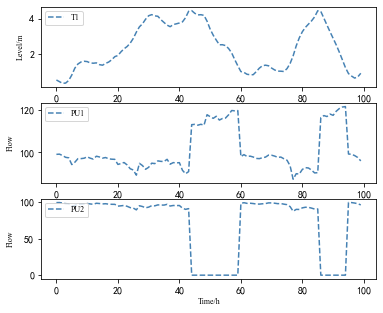

In [5]:
font1 = {'family' : 'Times New Roman',
        'weight' : 'normal',
        'size'   : 8,
            }
shade_of_gray = '0.75'
f, axes = plt.subplots(3,figsize = (6,5))
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
axes[0].plot(df_train_orig.iloc[:100,1],color='steelblue',linestyle = '--', label = 'T1')
#axes[0].fill_between(Yhat3.index, Yhat3.values, where=Yhat3.values <=1, interpolate=True, color='r')
#axes[0].plot(Y3, color = 'b', alpha = 0.75, lw = 2, label = 'real label')
#axes[0].set_title('T1',font1)
#axes[0].set_xlabel('Time/h',font2)
axes[0].set_ylabel('Level/m',font1)
axes[0].legend(loc='upper left',prop=font1)


axes[1].plot(df_train_orig.iloc[:100,8],color='steelblue',linestyle = '--', label = 'PU1')
#axes[1].set_title('PU1', font1)
axes[1].set_ylabel('Flow',font1)
#axes[1].legend(fontsize = 10, loc = 'upper left', bbox_to_anchor=(1.05,1.0),borderaxespad = 0.)
axes[1].legend(loc='upper left',prop=font1)

axes[2].plot(df_train_orig.iloc[:100,10],color='steelblue',linestyle = '--', label = 'PU2')
#axes[2].set_title('PU2', font1)
axes[2].set_xlabel('Time/h',font1)
axes[2].set_ylabel('Flow',font1)
#axes[2].set_yticks([0,1])
#axes[2].set_yticklabels(['No attack','Attack'],font1)
#axes[1].legend(fontsize = 10, loc = 'upper left', bbox_to_anchor=(1.05,1.0),borderaxespad = 0.)
axes[2].legend(loc='upper left',prop=font1)
plt.savefig("Train_T1_PU1_PU2.png", dpi=1000, bbox_inches = 'tight')

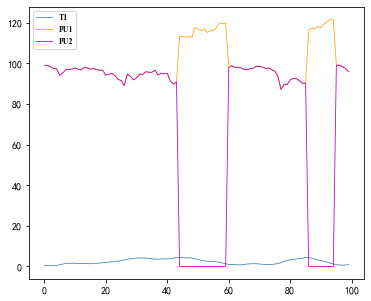

In [5]:
font1 = {'family' : 'Times New Roman',  
'weight' : 'normal',  
'size'   : 8,  
} 

figsize = 6, 5
plt.subplots(figsize=figsize)                                # 设定整张图片大小

ax1 = plt.subplot(1, 1, 1)
#ax1.yaxis.set_major_locator(MultipleLocator(15))             # 设定y轴刻度间距
#第一条线
y0 = df_train_orig.iloc[:100,1]
x0 = range(0, len(y0))
plt.plot(x0, y0, color='steelblue', label='T1', linewidth=0.8)  # 绘制，指定颜色、标签、线宽，标签采用latex格式                                          # 设定y轴范围
hl=plt.legend(loc='upper left', prop=font1)                                # 绘制图例，指定图例位置
#set(hl,'Box','off');
#第二条曲线
y1 = df_train_orig.iloc[:100,8]
x1 = range(0, len(y1))
plt.plot(x1, y1, color='orange', label='PU1', linewidth=0.8)
hl=plt.legend(loc='upper left', prop=font1)
#set(hl,'Box','off');
y2 = df_train_orig.iloc[:100,10]
x2 = range(0, len(y2))
plt.plot(x2, y2, color='m', label='PU2', linewidth=0.8)
hl=plt.legend(loc='upper left', prop=font1)



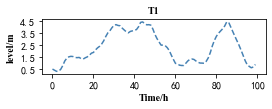

In [6]:
font2 = {'family' : 'Times New Roman',
        'weight' : 'normal',
        'size'   : 10,
            }
ax = plt.figure(figsize=(4,1))
ax = ax.add_subplot(1, 1, 1)
ax.set_yticks([0.50, 1.50, 2.50, 3.50, 4.50, 5.50])
#plt.figure(figsize=(10,2))
#plt.plot(3,1,1)
plt.plot(range(len(df_train_orig.iloc[:100,1])),df_train_orig.iloc[:100,1],color='steelblue',linestyle = '--')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.title('T1',font2)
plt.xlabel('Time/h',font2)
plt.ylabel('level/m',font2)
plt.savefig("Train_T1.png", dpi=1000, bbox_inches = 'tight')
#plt.legend(loc=0)

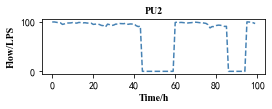

In [7]:
font2 = {'family' : 'Times New Roman',
        'weight' : 'normal',
        'size'   : 10,
            }
plt.figure(figsize=(4,1))
plt.plot(range(len(df_train_orig.iloc[:100,10])),df_train_orig.iloc[:100,10],color='steelblue',linestyle = '--')
plt.title('PU2',font2)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel('Time/h',font2)
plt.ylabel('Flow/LPS',font2)
plt.savefig("Train_PU2.png", dpi=1000, bbox_inches = 'tight')
#plt.legend(loc=0)

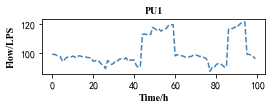

In [8]:
font2 = {'family' : 'Times New Roman',
        'weight' : 'normal',
        'size'   : 10,
            }
plt.figure(figsize=(4,1))
plt.plot(range(len(df_train_orig.iloc[:100,8])),df_train_orig.iloc[:100,8],color='steelblue',linestyle = '--')
plt.title('PU1',font2)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel('Time/h',font2)
plt.ylabel('Flow/LPS',font2)
plt.savefig("Train_PU1.png", dpi=1000, bbox_inches = 'tight')

Text(0, 0.5, 'State')

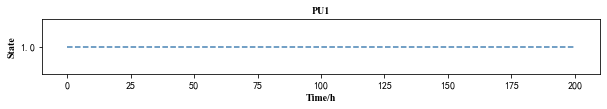

In [9]:
font2 = {'family' : 'Times New Roman',
        'weight' : 'normal',
        'size'   : 10,
            }
ax = plt.figure(figsize=(10,1))
ax = ax.add_subplot(1, 1, 1)
ax.set_yticks([0.0,0.5,1.0])
plt.plot(range(len(df_train_orig.iloc[:201,9])),df_train_orig.iloc[:201,9],color='steelblue',linestyle = '--')
plt.title('PU1',font2)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel('Time/h',font2)
plt.ylabel('State',font2)

Text(0, 0.5, 'State')

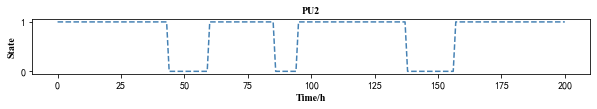

In [10]:
font2 = {'family' : 'Times New Roman',
        'weight' : 'normal',
        'size'   : 10,
            }
plt.figure(figsize=(10,1))
plt.plot(range(len(df_train_orig.iloc[:201,11])),df_train_orig.iloc[:201,11],color='steelblue',linestyle = '--')
plt.title('PU2',font2)
ax.set_yticks([0.00,0.50,0.75,1.00])
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel('Time/h',font2)
plt.ylabel('State',font2)

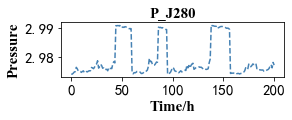

In [11]:
font2 = {'family' : 'Times New Roman',
        'weight' : 'normal',
        'size'   : 15,
            }
ax = plt.figure(figsize=(4,1))
ax = ax.add_subplot(1, 1, 1)
ax.set_yticks([2.9,2.96,2.97,2.98,2.99])
plt.plot(range(len(df_train_orig.iloc[:201,32])),df_train_orig.iloc[:201,32],color='steelblue',linestyle = '--')
plt.title('P_J280',font2)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('Time/h',font2)
plt.ylabel('Pressure',font2)
plt.savefig("Train_P_J280.png", dpi=1000, bbox_inches = 'tight')

In [5]:
# get dates and columns with sensor readings
dates_train = df_train_orig['DATETIME']
sensor_cols = [col for col in df_train_orig.columns if col not in ['DATETIME','ATT_FLAG']]

# scale sensor data
scaler = MinMaxScaler()
X = pd.DataFrame(index = df_train_orig.index, columns = sensor_cols, data = scaler.fit_transform(df_train_orig[sensor_cols]))

# split into training and validation
X1, X2, _, _  = train_test_split(X, X, test_size=0.33, random_state=42)
#X:8761,X1:5869,X2:2892

In [6]:
# Load dataset with attacks
df_test_01 = pd.read_csv(data_path + "dataset04.csv", parse_dates = ['DATETIME'], dayfirst=True)
df_test_02 = pd.read_csv(data_path + "test_dataset.csv", parse_dates = ['DATETIME'], dayfirst=True)

# scale datasets
X3 = pd.DataFrame(index = df_test_01.index, columns = sensor_cols, 
                  data = scaler.transform(df_test_01[sensor_cols]))
X4 = pd.DataFrame(index = df_test_02.index, columns = sensor_cols, 
                  data = scaler.transform(df_test_02[sensor_cols]))

# get targets
Y3 = df_test_01['ATT_FLAG']
Y4 = df_test_02['ATT_FLAG']
#Y3:valid_label,4177;Y4:test_label,2089

In [7]:
origin_dim = X1.shape[1]
epochs_layer = 25
epochs_whole = 50
batch_size = 16
h_dim1 = 32
h_dim2 = 16
h_dim3 = 8

In [8]:
def f2_score(label, predict):
    p = precision_score(label, predict)
    r = recall_score(label, predict)
    f2_score = 5*p*r / (4*p + r)
    return f2_score

In [9]:
# assess detection
def compute_scores(Y,Yhat):
    return [accuracy_score(Y,Yhat),f1_score(Y,Yhat),precision_score(Y,Yhat),recall_score(Y,Yhat),f2_score(Y,Yhat)]

In [10]:
def cm_plot(original_label, predict_label, pic=None):
    cm = confusion_matrix(original_label, predict_label)   # 由原标签和预测标签生成混淆矩阵
    plt.figure(figsize = (10,10))
    plt.matshow(cm, cmap=plt.cm.Blues)     # 画混淆矩阵，配色风格使用cm.Blues
    plt.colorbar()    # 颜色标签
    for x in range(len(cm)):
        for y in range(len(cm)):
            plt.annotate(cm[x, y], xy=(x, y), horizontalalignment='center', verticalalignment='center')
            # annotate主要在图形中添加注释
            # 第一个参数添加注释
            # 第二个参数是注释的内容
            # xy设置箭头尖的坐标
            # horizontalalignment水平对齐
            # verticalalignment垂直对齐
            # 其余常用参数如下:
            # xytext设置注释内容显示的起始位置
            # arrowprops 用来设置箭头
            # facecolor 设置箭头的颜色
            # headlength 箭头的头的长度
            # headwidth 箭头的宽度
            # width 箭身的宽度
    plt.ylabel('True label')  # 坐标轴标签
    plt.xlabel('Predicted label')  # 坐标轴标签
    plt.title('confusion matrix')
    if pic is not None:
        plt.savefig(str(pic) + '.jpg')
    plt.show()

In [11]:
def pred_error(preds,x):
        #preds = preds.reshape(preds.shape[0],preds.shape[1])
        #x=x.reshape(x.shape[0],x.shape[1])
        errors = (x-preds)**2
        return preds, errors

In [12]:
def detect(preds,x, theta, window = 1, average=False, sys_theta = 0):
        preds, temp = pred_error(preds,x)
        #x=x.reshape(x.shape[0],x.shape[1])
        temp = (x-preds)**2
        #temp = pd.DataFrame(temp)
        if average:
            errors = temp.mean(axis=1).rolling(window=window).mean()
            detection = errors > theta
        else:
            errors = temp.rolling(window=window).mean()
            detection = errors.apply(lambda x: x>np.max(theta.name, sys_theta))

        return detection, errors
    
    


In [13]:
##### 设置网络参数 #####
p = 0.05  # 使大部分神经元的激活值（所有神经元的激活值的平均值）接近这个p值
beta = 3  # 控制KL散度所占的比重
lambda_val = 0.001  # weight decay
# 自定义正则项函数, 计算KL散度
def sparse_reg(activity_matrix):
        activity_matrix = K.softmax(activity_matrix, axis=0)  # 把激活值先用softmax归一化
        p_hat = K.mean(activity_matrix, axis=0)  # 将第j个神经元在batch_size个输入下所有的输出激活值取平均
        print('p_hat=', p_hat)
        KLD = p*(K.log(p/p_hat))+(1-p)*(K.log((1-p)/(1-p_hat)))  # 计算KL散度
        print('KLD=', KLD)
        return beta*K.sum(KLD)  # 所有神经元的KL散度相加并乘以beta

In [14]:
adam = tf.optimizers.Adam(lr = 0.001)

D:\anaconda\Anaconda\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [15]:
# train models with early stopping and reduction of learning rate on plateau
earlyStopping= EarlyStopping(monitor='val_loss', patience=3, verbose=0,  min_delta=1e-4, mode='auto')
lr_reduced = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=1, verbose=0, epsilon=1e-4, mode='min')

In [16]:
##### 构建单个autoencoder #####
class AutoEncoderLayer():
    def __init__(self, input_dim, output_dim):
        self.input_dim = input_dim
        self.output_dim = output_dim
        self.build()

    def build(self):
        self.input = Input(shape=(self.input_dim,))
        self.encode_layer = Dense(self.output_dim, activation='tanh')
        self.encoded = self.encode_layer(self.input)
        self.encoder = Model(self.input, self.encoded)

        self.decode_layer = Dense(self.input_dim, activation='tanh')
        self.decoded = self.decode_layer(self.encoded)

        self.autoencoder = Model(self.input, self.decoded)

In [17]:
# 构建堆叠DAE
class StackedAutoEncoder():
    def __init__(self, layer_list):
        self.layer_list = layer_list
        self.build()

    def build(self):
        out = self.layer_list[0].encoded
        for i in range(1, num_layers - 1):
            out = self.layer_list[i].encode_layer(out)
        self.model = Model(self.layer_list[0].input, out)

In [18]:
def train_layers(encoder_list=None, layer=None, epochs=None, batch_size=None):
    
    #预训练：逐层训练，当训练第layer个ae时，使用前（layer-1）个ae训练好的encoder的参数
    #:param encoder_list:
    #:param layer:
    #:param epochs:
    #:param batch_size:
    #:return:
    
    # 对前(layer-1)层用已经训练好的参数进行前向计算，ps:第0层没有前置层
    out = X1
    origin = X1
    if layer != 0:
        for i in range(layer):
            # print("encoder weight", str(i), ":", encoder_list[i].encoder.get_weights()[0])
            out = encoder_list[i].encoder.predict(out)

    encoder_list[layer].autoencoder.summary()
    encoder_list[layer].autoencoder.compile(optimizer=adam, loss='mse')

    # 训练第layer个ae
    layer = encoder_list[layer].autoencoder.fit(
        out,
        origin if layer == 0 else out,
        epochs=epochs,
        batch_size=batch_size,
        callbacks = [earlyStopping, lr_reduced],
        shuffle=True,
        verbose=2
    )

    #plt.figure()
    loss = layer.history['loss']
    #epochs = range(len(loss))
    #plt.figure()
    #font2 = {'family': 'Times New Roman',
     #    'weight': 'normal',
     #    'size': 8,
     #    }
    #plt.plot(epochs, loss, 'b', label='Training loss',linestyle=':')
    #plt.title('SAE Training layers loss',fontsize='8')
    #plt.xlabel('iterations',fontsize='8')
    #plt.ylabel('loss',fontsize='8')
    #plt.legend()
    #plt.show()
    

    #设置输出的图片大小
    figsize = 4,1
    plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
    figure, ax = plt.subplots(figsize=figsize)
    #plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
    #在同一幅图片上画两条折线
    shade_of_gray = '0.7'
    A,=plt.plot(loss,color='steelblue',label='Layer training loss',linestyle=':',linewidth=3)
 
    #设置图例并且设置图例的字体及大小
    font1 = {'family' : 'Times New Roman',
        'weight' : 'normal',
        'size'   : 10,
            }
    legend = plt.legend(handles=[A],prop=font1)
 
    #设置坐标刻度值的大小以及刻度值的字体
    #plt.tick_params(labelsize=23)
    #labels = ax.get_xticklabels() + ax.get_yticklabels()
    #[label.set_fontname('Times New Roman') for label in labels]
    
    ax.set_xlim(0, 25)
    
    #设置横纵坐标的名称以及对应字体格式
    font2 = {'family' : 'Times New Roman',
        'weight' : 'normal',
        'size'   : 10,
            }
    plt.xlabel('Iteration',font2)
    plt.ylabel('Loss',font2)
 
    #将文件保存至文件中并且画出图
    #plt.savefig('figure.eps')
    plt.savefig("Layer training loss.png", dpi=1000, bbox_inches = 'tight')
    plt.show()

In [19]:
def train_whole(sae=None, epochs=None, batch_size=None):
    
    #用预训练好的参数初始化stacked ae的参数，然后进行全局训练优化
    #:param model:
    #:param epochs:
    #:param batch_size:
    #:return:
    
    # print("stacked sae weights:")
    # print(sae.model.get_weights())
    sae.model.summary()
    sae.model.compile(optimizer=adam, loss='mse')
    whole = sae.model.fit(
        X1,
        X1,
        epochs=epochs,
        batch_size=batch_size,
        callbacks = [earlyStopping, lr_reduced],
        shuffle=True,
        validation_data=(X2,X2),
        verbose=2
    )
    #plt.figure()
    loss = whole.history['loss']
    val_loss = whole.history['val_loss']
    #epochs = range(len(loss))
    #plt.figure()
    #font2 = {'family': 'Times New Roman',
        # 'weight': 'normal',
        # 'size': 30,
        # }
    #plt.plot(epochs, loss, 'r', label='Training loss',linestyle=':')
    #plt.plot(epochs, val_loss, 'g', label='Validation loss',linestyle=':')
    #plt.title('SAE Training and validation loss',fontsize='8')
    #plt.xlabel('iterations',fontsize='8')
    #plt.ylabel('loss',fontsize='8')
    #plt.legend()
    #plt.show()
    
        #设置输出的图片大小
    figsize = 4,1
    plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
    figure, ax = plt.subplots(figsize=figsize)
    #plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
    #在同一幅图片上画两条折线
    shade_of_gray = '0.7'
    A,=plt.plot(loss,color='steelblue',label='Training loss',linestyle=':',linewidth=3)
    B,=plt.plot(val_loss,color='orange',label='Validation loss',linestyle=':',linewidth=3)
    #设置图例并且设置图例的字体及大小
    font1 = {'family' : 'Times New Roman',
        'weight' : 'normal',
        'size'   : 10,
            }
    legend = plt.legend(handles=[A,B],prop=font1)
 
    #设置坐标刻度值的大小以及刻度值的字体
    #plt.tick_params(labelsize=23)
    #labels = ax.get_xticklabels() + ax.get_yticklabels()
    #[label.set_fontname('Times New Roman') for label in labels]
    
    ax.set_xlim(0, 15)
    
    #设置横纵坐标的名称以及对应字体格式
    font2 = {'family' : 'Times New Roman',
        'weight' : 'normal',
        'size'   : 10,
            }
    plt.xlabel('Iteration',font2)
    plt.ylabel('Loss',font2)
 
    #将文件保存至文件中并且画出图
    #plt.savefig('figure.eps')
    plt.savefig("Loss.png", dpi=1000, bbox_inches = 'tight')
    plt.show()

In [ ]:
# 5层的stacked ae，实际上要使用4个ae，实例化4个ae
num_layers = 5
encoder_1 = AutoEncoderLayer(origin_dim, h_dim1)
encoder_2 = AutoEncoderLayer(h_dim1, h_dim2)
decoder_3 = AutoEncoderLayer(h_dim2, h_dim1)
decoder_4 = AutoEncoderLayer(h_dim1, origin_dim)
autoencoder_list = [encoder_1, encoder_2, decoder_3, decoder_4]

# 按照顺序对每一层进行预训练
print("Pre training:")
for level in range(num_layers - 1):
    print("level:", level)
    train_layers(encoder_list=autoencoder_list, layer=level, epochs=epochs_layer, batch_size=batch_size)


# 用训练好的4个ae构建stacked dae
stacked_ae = StackedAutoEncoder(autoencoder_list)
print("Whole training:")
# 进行全局训练优化
train_whole(sae=stacked_ae, epochs=epochs_whole, batch_size=batch_size)

Pre training:
level: 0
Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 43)]              0         
                                                                 
 dense (Dense)               (None, 32)                1408      
                                                                 
 dense_1 (Dense)             (None, 43)                1419      
                                                                 
Total params: 2,827
Trainable params: 2,827
Non-trainable params: 0
_________________________________________________________________
Epoch 1/25


In [ ]:
##### 显示stacked dae重构后的效果 #####
X1_pre = stacked_ae.model.predict(X1)
X2_pre = stacked_ae.model.predict(X2)
X3_pre = stacked_ae.model.predict(X3)
X4_pre = stacked_ae.model.predict(X4)
#print('X1: ',X1)
#print('X1_pre: ',X1_pre)
#print('X2: ',X2)
#print('X2_pre: ',X2_pre)
#print('X3: ',X3)
#print('X3_pre: ',X3_pre)
#print('X4: ',X2)
#print('X4_pre: ',X4_pre)

In [ ]:
X3_T1_PJ280_error = (np.array(X3)[2330:2400,32]-np.array(X3_pre)[2330:2400,32])**2
print('mean: ',X3_T1_PJ280_error.mean(axis=0))
X3_T1_PJ269_error = (np.array(X3)[2330:2400,33]-np.array(X3_pre)[2330:2400,33])**2
X3_T1_PU1_error = (np.array(X3)[2330:2400,8]-np.array(X3_pre)[2330:2400,8])**2
X3_T1_PU2_error = (np.array(X3)[2330:2400,10]-np.array(X3_pre)[2330:2400,10])**2
errors = pd.DataFrame({ 'X3_T1_PU1_error' : X3_T1_PU1_error,
                       'X3_T1_PU2_error' : X3_T1_PU2_error,
                      'X3_T1_PJ269_error' : X3_T1_PJ269_error,
                      'X3_T1_PJ280_error' : X3_T1_PJ280_error})
print(errors)

#errors_ = errors.mean(axis=1).rolling(window=1).mean()
#errors_ = errors.mean(axis=1).rolling(window=3).mean()
errors_ = errors.mean(axis=1).rolling(window=6).mean()
errors_ = np.array(errors_)
#print(errors_)

error_df = pd.DataFrame({'Error': errors_,
                         'True_class': df_test_01.ATT_FLAG[2330:2400]})
#print(error_df)
plot_error(error_df, threshold=4.0e-3, 
           title='Residual for {} '.format('attack T1'))

    X4_T3_PJ256_error  X4_T3_PJ300_error  X4_T3_PU4_error  X4_T3_PU5_error
0        3.024821e-04       2.143949e-03         0.001031         0.000058
1        7.234993e-05       7.722410e-03         0.009379         0.000046
2        4.437297e-05       2.002665e-03         0.002109         0.000066
3        1.923589e-05       9.763931e-04         0.000558         0.000072
4        6.770578e-09       1.301789e-03         0.000074         0.000072
..                ...                ...              ...              ...
95       4.346689e-04       2.635192e-03         0.000778         0.000004
96       1.391036e-06       4.873618e-06         0.002887         0.000031
97       1.390518e-04       1.292711e-04         0.001562         0.000052
98       3.401406e-04       4.478192e-07         0.000344         0.000042
99       1.165491e-04       1.659021e-03         0.000370         0.000007

[100 rows x 4 columns]


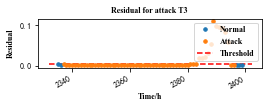

In [41]:
X4_T3_PJ256_error = (np.array(X4)[280:380,35]-np.array(X4_pre)[280:380,35])**2
X4_T3_PJ300_error = (np.array(X4)[280:380,34]-np.array(X4_pre)[280:380,34])**2
X4_T3_PU4_error = (np.array(X4)[280:380,14]-np.array(X4_pre)[280:380,14])**2
X4_T3_PU5_error = (np.array(X4)[280:380,16]-np.array(X4_pre)[280:380,16])**2
errors1 = pd.DataFrame({ 'X4_T3_PJ256_error' : X4_T3_PJ256_error,
                       'X4_T3_PJ300_error' : X4_T3_PJ300_error,
                      'X4_T3_PU4_error' : X4_T3_PU4_error,
                      'X4_T3_PU5_error' : X4_T3_PU5_error})
print(errors1)

#errors_ = errors.mean(axis=1).rolling(window=1).mean()
#errors_ = errors.mean(axis=1).rolling(window=3).mean()
errors1_ = errors1.mean(axis=1).rolling(window=6).mean()
errors1_ = np.array(errors1_)
#print(errors_)

error_df1 = pd.DataFrame({'Error': errors1_,
                         'True_class': df_test_02.ATT_FLAG[280:380]})
#print(error_df)
plot_error(error_df, threshold=4.0e-3, 
           title='Residual for {} '.format('attack T3'))

    X4_T7_PJ307_error  X4_T7_PJ317_error  X4_T7_PU10_error  X4_T7_PU11_error
0        9.381393e-04           0.000180          0.000547      8.248192e-07
1        4.553361e-04           0.001191          0.003939      2.852951e-04
2        3.779484e-03           0.001062          0.000062      5.623447e-05
3        1.144312e-03           0.000141          0.001442      5.491823e-06
4        5.806474e-04           0.000560          0.000836      6.327701e-07
..                ...                ...               ...               ...
85       2.865704e-03           0.000027          0.000104      7.867683e-05
86       9.958072e-07           0.000059          0.000111      5.540123e-05
87       8.307270e-04           0.000093          0.000142      4.940149e-05
88       1.682766e-04           0.000092          0.000141      2.063977e-05
89       1.440163e-03           0.000002          0.000625      2.280870e-05

[90 rows x 4 columns]


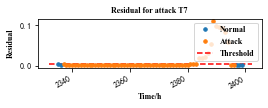

In [44]:
#T7
X4_T7_PJ307_error = (np.array(X4)[1570:1660,40]-np.array(X4_pre)[1570:1660,40])**2
X4_T7_PJ317_error = (np.array(X4)[1570:1660,33]-np.array(X4_pre)[1570:1660,33])**2
X4_T7_PU10_error = (np.array(X4)[1570:1660,26]-np.array(X4_pre)[1570:1660,26])**2
X4_T7_PU11_error = (np.array(X4)[1570:1660,28]-np.array(X4_pre)[1570:1660,28])**2
errors2 = pd.DataFrame({ 'X4_T7_PJ307_error' : X4_T7_PJ307_error,
                       'X4_T7_PJ317_error' : X4_T7_PJ317_error,
                      'X4_T7_PU10_error' : X4_T7_PU10_error,
                      'X4_T7_PU11_error' : X4_T7_PU11_error})
print(errors2)

#errors_ = errors.mean(axis=1).rolling(window=1).mean()
#errors_ = errors.mean(axis=1).rolling(window=3).mean()
errors2_ = errors2.mean(axis=1).rolling(window=6).mean()
errors2_ = np.array(errors2_)
#print(errors_)

error_df2 = pd.DataFrame({'Error': errors2_,
                         'True_class': df_test_02.ATT_FLAG[1570:1660]})
#print(error_df)
plot_error(error_df, threshold=4.0e-3, 
           title='Residual for {} '.format('attack T7'))

mean:  0.0027286162873537433
mean2:  0.0032545639819906175
mean3:  0.001795332428751862


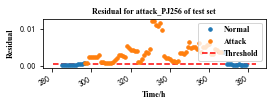

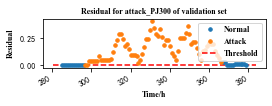

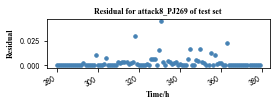

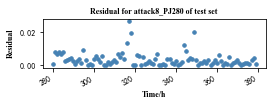

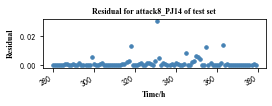

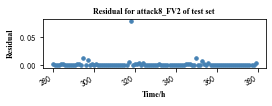

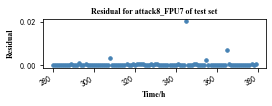

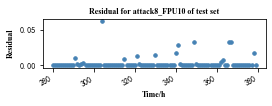

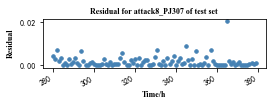

In [52]:
#attackT3
X4_attack8_PJ256_error_ = (np.array(X4)[280:380,35]-np.array(X4_pre)[280:380,35])**2
print('mean: ',X4_attack8_PJ256_error_.mean(axis=0))
X4_attack8_PJ300_error_ = (np.array(X4)[280:380,34]-np.array(X4_pre)[280:380,34])**2
font2 = {'family' : 'Times New Roman',
        'weight' : 'normal',
        'size'   : 8,
            }
font1 = {'family' : 'Times New Roman',
        'weight' : 'normal',
        'size'   : 6,
            }
errors0 = pd.DataFrame({'X4_attack8_PJ256_error_' :X4_attack8_PJ256_error_
                           })
errors0_ = errors0.mean(axis=1).rolling(window=6).mean()
errors0_ = np.array(errors0_)
#print(errors_)

error_df0 = pd.DataFrame({'Error': errors0_,
                         'True_class': df_test_02.ATT_FLAG[280:380]})
#print(error_df)
plot_error(error_df0,threshold = 5e-4,title='Residual for {}'.format('attack_PJ256 of test set'))


errors1 = pd.DataFrame({'X4_attack8_PJ300_error_' :X4_attack8_PJ300_error_
                           })
errors1_ = errors1.mean(axis=1).rolling(window=6).mean()
errors1_ = np.array(errors1_)
#print(errors_)

error_df1 = pd.DataFrame({'Error': errors1_,
                         'True_class': df_test_02.ATT_FLAG[280:380]})
#print(error_df)
plot_error(error_df1,threshold = 5e-4,title='Residual for {}'.format('attack_PJ300 of validation set'))

#T1
X4_attack8_PJ269_error = (np.array(X4)[280:380,33]-np.array(X4_pre)[280:380,33])**2
#print(X3_LT1_error,X3_LT1_error.shape)#100x1
error_df = pd.DataFrame({'Error': X4_attack8_PJ269_error,
                         'True_class': df_test_02.ATT_FLAG[280:380]})
no_attack_plot_error(error_df,threshold = False,title='Residual for {}'.format('attack8_PJ269 of test set'))

X4_attack8_PJ280_error = (np.array(X4)[280:380,32]-np.array(X4_pre)[280:380,32])**2
#print(X3_LT1_error,X3_LT1_error.shape)#100x1
error_df = pd.DataFrame({'Error': X4_attack8_PJ280_error,
                         'True_class': df_test_02.ATT_FLAG[280:380]})
no_attack_plot_error(error_df,threshold = False,title='Residual for {}'.format('attack8_PJ280 of test set'))

#T2
X4_attack8_PJ14_error = (np.array(X4)[280:380,42]-np.array(X4_pre)[280:380,42])**2
#print(X3_LT1_error,X3_LT1_error.shape)#100x1
error_df = pd.DataFrame({'Error': X4_attack8_PJ14_error,
                         'True_class': df_test_02.ATT_FLAG[280:380]})
no_attack_plot_error(error_df,threshold = False,title='Residual for {}'.format('attack8_PJ14 of test set'))

X4_attack8_FV2_error = (np.array(X4)[280:380,30]-np.array(X4_pre)[280:380,30])**2
#print(X3_LT1_error,X3_LT1_error.shape)#100x1
error_df = pd.DataFrame({'Error': X4_attack8_FV2_error,
                         'True_class': df_test_02.ATT_FLAG[280:380]})
no_attack_plot_error(error_df,threshold = False,title='Residual for {}'.format('attack8_FV2 of test set'))

#T4
X4_attack8_FPU7_error = (np.array(X4)[280:380,20]-np.array(X4_pre)[280:380,20])**2
#print(X3_LT1_error,X3_LT1_error.shape)#100x1
error_df = pd.DataFrame({'Error': X4_attack8_FPU7_error,
                         'True_class': df_test_02.ATT_FLAG[280:380]})
no_attack_plot_error(error_df,threshold = False,title='Residual for {}'.format('attack8_FPU7 of test set'))

#T6
X4_attack8_FPU10_error = (np.array(X4)[280:380,26]-np.array(X4_pre)[280:380,26])**2
print('mean2: ',X4_attack8_FPU10_error.mean(axis=0))
#print(X3_LT1_error,X3_LT1_error.shape)#100x1
error_df = pd.DataFrame({'Error': X4_attack8_FPU10_error,
                         'True_class': df_test_02.ATT_FLAG[280:380]})
no_attack_plot_error(error_df,threshold = False,title='Residual for {}'.format('attack8_FPU10 of test set'))

#T7
X4_attack8_PJ307_error = (np.array(X4)[280:380,40]-np.array(X4_pre)[280:380,40])**2
print('mean3: ',X4_attack8_PJ307_error.mean(axis=0))
#print(X3_LT1_error,X3_LT1_error.shape)#100x1
error_df = pd.DataFrame({'Error': X4_attack8_PJ307_error,
                         'True_class': df_test_02.ATT_FLAG[280:380]})
no_attack_plot_error(error_df,threshold = False,title='Residual for {}'.format('attack8_PJ307 of test set'))

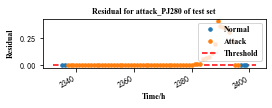

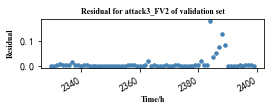

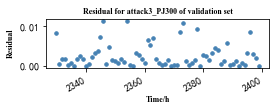

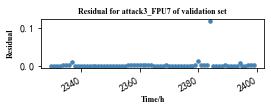

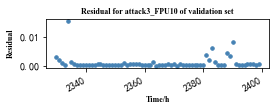

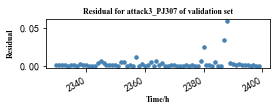

In [282]:
#attackT1
X3_attack3_PJ280_error_ = (np.array(X3)[2330:2400,32]-np.array(X3_pre)[2330:2400,32])**2
X3_attack3_PJ269_error_ = (np.array(X3)[2330:2400,33]-np.array(X3_pre)[2330:2400,33])**2
font2 = {'family' : 'Times New Roman',
        'weight' : 'normal',
        'size'   : 8,
            }
font1 = {'family' : 'Times New Roman',
        'weight' : 'normal',
        'size'   : 6,
            }
errors0 = pd.DataFrame({'X3_attack3_PJ280_error_' :X3_attack3_PJ280_error_
                           })
errors0_ = errors0.mean(axis=1).rolling(window=6).mean()
errors0_ = np.array(errors0_)
#print(errors_)

error_df0 = pd.DataFrame({'Error': errors0_,
                         'True_class': df_test_01.ATT_FLAG[2330:2400]})
#print(error_df)
plot_error(error_df0,threshold = 5e-4,title='Residual for {}'.format('attack_PJ280 of test set'))

#T2
X3_attack3_FV2_error = (np.array(X3)[2330:2400,30]-np.array(X3_pre)[2330:2400,30])**2
#print(X3_LT1_error,X3_LT1_error.shape)#100x1
error_df = pd.DataFrame({'Error': X3_attack3_FV2_error,
                         'True_class': df_test_01.ATT_FLAG[2330:2400]})
no_attack_plot_error(error_df,threshold = False,title='Residual for {}'.format('attack3_FV2 of validation set'))

#T3
X3_attack3_PJ300_error = (np.array(X3)[2330:2400,34]-np.array(X3_pre)[2330:2400,34])**2
#print(X3_LT1_error,X3_LT1_error.shape)#100x1
error_df = pd.DataFrame({'Error': X3_attack3_PJ300_error,
                         'True_class': df_test_01.ATT_FLAG[2330:2400]})
no_attack_plot_error(error_df,threshold = False,title='Residual for {}'.format('attack3_PJ300 of validation set'))

#T4
X3_attack3_FPU7_error = (np.array(X3)[2330:2400,20]-np.array(X3_pre)[2330:2400,20])**2
#print(X3_LT1_error,X3_LT1_error.shape)#100x1
error_df = pd.DataFrame({'Error': X3_attack3_FPU7_error,
                         'True_class': df_test_01.ATT_FLAG[2330:2400]})
no_attack_plot_error(error_df,threshold = False,title='Residual for {}'.format('attack3_FPU7 of validation set'))

#T6
X3_attack3_FPU10_error = (np.array(X3)[2330:2400,26]-np.array(X3_pre)[2330:2400,26])**2
#print(X3_LT1_error,X3_LT1_error.shape)#100x1
error_df = pd.DataFrame({'Error': X3_attack3_FPU10_error,
                         'True_class': df_test_01.ATT_FLAG[2330:2400]})
no_attack_plot_error(error_df,threshold = False,title='Residual for {}'.format('attack3_FPU10 of validation set'))

#T7
X3_attack3_PJ307_error = (np.array(X3)[2330:2400,40]-np.array(X3_pre)[2330:2400,40])**2
#print(X3_LT1_error,X3_LT1_error.shape)#100x1
error_df = pd.DataFrame({'Error': X3_attack3_PJ307_error,
                         'True_class': df_test_01.ATT_FLAG[2330:2400]})
no_attack_plot_error(error_df,threshold = False,title='Residual for {}'.format('attack3_PJ307 of validation set'))

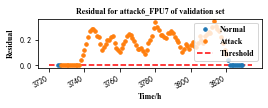

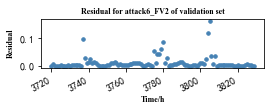

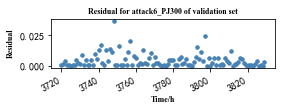

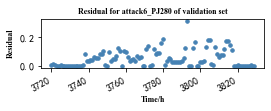

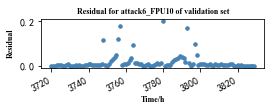

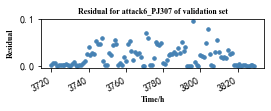

In [285]:
#attackT4
X3_attack6_FPU7_error_ = (np.array(X3)[3720:3830,20]-np.array(X3_pre)[3720:3830,20])**2
X3_attack6_PJ269_error_ = (np.array(X3)[3720:3830,33]-np.array(X3_pre)[3720:3830,33])**2
font2 = {'family' : 'Times New Roman',
        'weight' : 'normal',
        'size'   : 8,
            }
font1 = {'family' : 'Times New Roman',
        'weight' : 'normal',
        'size'   : 6,
            }
errors0 = pd.DataFrame({'X3_attack6_FPU7_error_' :X3_attack6_FPU7_error_
                           })
errors0_ = errors0.mean(axis=1).rolling(window=6).mean()
errors0_ = np.array(errors0_)
#print(errors_)

error_df0 = pd.DataFrame({'Error': errors0_,
                         'True_class': df_test_01.ATT_FLAG[3720:3830]})
#print(error_df)
plot_error(error_df0,threshold = 5e-4,title='Residual for {}'.format('attack6_FPU7 of validation set'))

#T2
X3_attack6_FV2_error = (np.array(X3)[3720:3830,30]-np.array(X3_pre)[3720:3830,30])**2
#print(X3_LT1_error,X3_LT1_error.shape)#100x1
error_df = pd.DataFrame({'Error': X3_attack6_FV2_error,
                         'True_class': df_test_01.ATT_FLAG[3720:3830]})
no_attack_plot_error(error_df,threshold = False,title='Residual for {}'.format('attack6_FV2 of validation set'))

#T3
X3_attack6_PJ300_error = (np.array(X3)[3720:3830,34]-np.array(X3_pre)[3720:3830,34])**2
#print(X3_LT1_error,X3_LT1_error.shape)#100x1
error_df = pd.DataFrame({'Error': X3_attack6_PJ300_error,
                         'True_class': df_test_01.ATT_FLAG[3720:3830]})
no_attack_plot_error(error_df,threshold = False,title='Residual for {}'.format('attack6_PJ300 of validation set'))

#T1
X3_attack6_PJ280_error = (np.array(X3)[3720:3830,32]-np.array(X3_pre)[3720:3830,32])**2
error_df = pd.DataFrame({'Error': X3_attack6_PJ280_error,
                         'True_class': df_test_01.ATT_FLAG[3720:3830]})
no_attack_plot_error(error_df,threshold = False,title='Residual for {}'.format('attack6_PJ280 of validation set'))

#T6
X3_attack6_FPU10_error = (np.array(X3)[3720:3830,26]-np.array(X3_pre)[3720:3830,26])**2
#print(X3_LT1_error,X3_LT1_error.shape)#100x1
error_df = pd.DataFrame({'Error': X3_attack6_FPU10_error,
                         'True_class': df_test_01.ATT_FLAG[3720:3830]})
no_attack_plot_error(error_df,threshold = False,title='Residual for {}'.format('attack6_FPU10 of validation set'))

#T7
X3_attack6_PJ307_error = (np.array(X3)[3720:3830,40]-np.array(X3_pre)[3720:3830,40])**2
#print(X3_LT1_error,X3_LT1_error.shape)#100x1
error_df = pd.DataFrame({'Error': X3_attack6_PJ307_error,
                         'True_class': df_test_01.ATT_FLAG[3720:3830]})
no_attack_plot_error(error_df,threshold = False,title='Residual for {}'.format('attack6_PJ307 of validation set'))

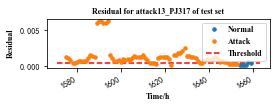

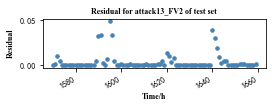

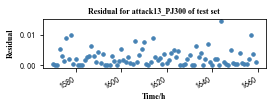

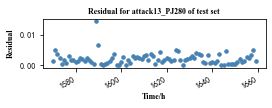

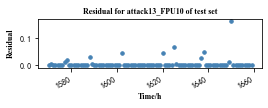

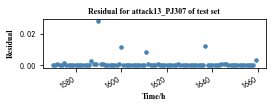

In [45]:
#attackT7
X4_attack13_PJ307_error_ = (np.array(X4)[1570:1660,40]-np.array(X4_pre)[1570:1660,40])**2
X4_attack13_PJ317_error_ = (np.array(X4)[1570:1660,41]-np.array(X4_pre)[1570:1660,41])**2
font2 = {'family' : 'Times New Roman',
        'weight' : 'normal',
        'size'   : 8,
            }
font1 = {'family' : 'Times New Roman',
        'weight' : 'normal',
        'size'   : 6,
            }
errors0 = pd.DataFrame({'X4_attack13_PJ317_error_' :X4_attack13_PJ317_error_
                           })
errors0_ = errors0.mean(axis=1).rolling(window=6).mean()
errors0_ = np.array(errors0_)
#print(errors_)

error_df0 = pd.DataFrame({'Error': errors0_,
                         'True_class': df_test_02.ATT_FLAG[1570:1660]})
#print(error_df)
plot_error(error_df0,threshold = 5e-4,title='Residual for {}'.format('attack13_PJ317 of test set'))

#T2
X4_attack13_FV2_error = (np.array(X4)[1570:1660,30]-np.array(X4_pre)[1570:1660,30])**2
#print(X3_LT1_error,X3_LT1_error.shape)#100x1
error_df = pd.DataFrame({'Error': X4_attack13_FV2_error,
                         'True_class': df_test_02.ATT_FLAG[1570:1660]})
no_attack_plot_error(error_df,threshold = False,title='Residual for {}'.format('attack13_FV2 of test set'))

#T3
X4_attack13_PJ300_error = (np.array(X4)[1570:1660,34]-np.array(X4_pre)[1570:1660,34])**2
#print(X3_LT1_error,X3_LT1_error.shape)#100x1
error_df = pd.DataFrame({'Error': X4_attack13_PJ300_error,
                         'True_class': df_test_02.ATT_FLAG[1570:1660]})
no_attack_plot_error(error_df,threshold = False,title='Residual for {}'.format('attack13_PJ300 of test set'))

#T1
X4_attack13_PJ280_error = (np.array(X4)[1570:1660,32]-np.array(X4_pre)[1570:1660,32])**2
error_df = pd.DataFrame({'Error': X4_attack13_PJ280_error,
                         'True_class': df_test_02.ATT_FLAG[1570:1660]})
no_attack_plot_error(error_df,threshold = False,title='Residual for {}'.format('attack13_PJ280 of test set'))

#T6
X4_attack13_FPU10_error = (np.array(X4)[1570:1660,26]-np.array(X4_pre)[1570:1660,26])**2
#print(X3_LT1_error,X3_LT1_error.shape)#100x1
error_df = pd.DataFrame({'Error': X4_attack13_FPU10_error,
                         'True_class': df_test_02.ATT_FLAG[1570:1660]})
no_attack_plot_error(error_df,threshold = False,title='Residual for {}'.format('attack13_FPU10 of test set'))

#T4
X4_attack13_PJ307_error = (np.array(X4)[1570:1660,20]-np.array(X4_pre)[1570:1660,20])**2
#print(X3_LT1_error,X3_LT1_error.shape)#100x1
error_df = pd.DataFrame({'Error': X4_attack13_PJ307_error,
                         'True_class': df_test_02.ATT_FLAG[1570:1660]})
no_attack_plot_error(error_df,threshold = False,title='Residual for {}'.format('attack13_PJ307 of test set'))

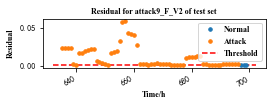

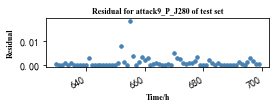

In [304]:
#attackT2(V2)
X4_attack9_FV2_error_ = (np.array(X4)[630:700,30]-np.array(X4_pre)[630:700,30])**2
X4_attack9_PJ269_error_ = (np.array(X4)[1570:1660,33]-np.array(X4_pre)[1570:1660,33])**2
font2 = {'family' : 'Times New Roman',
        'weight' : 'normal',
        'size'   : 8,
            }
font1 = {'family' : 'Times New Roman',
        'weight' : 'normal',
        'size'   : 6,
            }
errors0 = pd.DataFrame({'X4_attack9_FV2_error_' :X4_attack9_FV2_error_
                           })
errors0_ = errors0.mean(axis=1).rolling(window=6).mean()
errors0_ = np.array(errors0_)
#print(errors_)

error_df0 = pd.DataFrame({'Error': errors0_,
                         'True_class': df_test_02.ATT_FLAG[630:700]})
#print(error_df)
plot_error(error_df0,threshold = 5e-4,title='Residual for {}'.format('attack9_F_V2 of test set'))

#T1
X4_attack9_PJ280_error = (np.array(X4)[630:700,32]-np.array(X4_pre)[630:700,32])**2
error_df = pd.DataFrame({'Error': X4_attack13_PJ280_error,
                         'True_class': df_test_02.ATT_FLAG[630:700]})
no_attack_plot_error(error_df,threshold = False,title='Residual for {}'.format('attack9_P_J280 of test set'))

In [ ]:
#T3
X4_attack9_PJ300_error = (np.array(X4)[630:700,34]-np.array(X4_pre)[630:700,34])**2
#print(X3_LT1_error,X3_LT1_error.shape)#100x1
error_df = pd.DataFrame({'Error': X4_attack13_PJ300_error,
                         'True_class': df_test_02.ATT_FLAG[630:700]})
no_attack_plot_error(error_df,threshold = False,title='Residual for {}'.format('attack9_PJ300 of test set'))


#T7
X4_attack13_FV2_error = (np.array(X4)[630:700,40]-np.array(X4_pre)[630:700,40])**2
#print(X3_LT1_error,X3_LT1_error.shape)#100x1
error_df = pd.DataFrame({'Error': X4_attack13_FV2_error,
                         'True_class': df_test_02.ATT_FLAG[630:700]})
no_attack_plot_error(error_df,threshold = False,title='Residual for {}'.format('attack13_FV2 of test set'))


#T1
X4_attack13_PJ280_error = (np.array(X4)[630:700,32]-np.array(X4_pre)[630:700,32])**2
error_df = pd.DataFrame({'Error': X4_attack13_PJ280_error,
                         'True_class': df_test_02.ATT_FLAG[630:700]})
no_attack_plot_error(error_df,threshold = False,title='Residual for {}'.format('attack13_PJ280 of test set'))

#T6
X4_attack13_FPU10_error = (np.array(X4)[630:700,26]-np.array(X4_pre)[630:700,26])**2
#print(X3_LT1_error,X3_LT1_error.shape)#100x1
error_df = pd.DataFrame({'Error': X4_attack13_FPU10_error,
                         'True_class': df_test_02.ATT_FLAG[630:700]})
no_attack_plot_error(error_df,threshold = False,title='Residual for {}'.format('attack13_FPU10 of test set'))

#T4
X4_attack13_PJ307_error = (np.array(X4)[630:700,20]-np.array(X4_pre)[630:700,20])**2
#print(X3_LT1_error,X3_LT1_error.shape)#100x1
error_df = pd.DataFrame({'Error': X4_attack13_PJ307_error,
                         'True_class': df_test_02.ATT_FLAG[630:700]})
no_attack_plot_error(error_df,threshold = False,title='Residual for {}'.format('attack13_PJ307 of test set'))

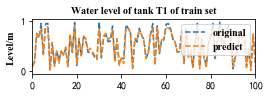

In [29]:
X3_pre_df = pd.DataFrame(X3_pre)
X4_pre_df = pd.DataFrame(X4_pre)
# plot the original predicted results
font2 = {'family' : 'Times New Roman',
        'weight' : 'normal',
        'size'   : 10,
            }
font1 = {'predict','original'}
signal = 'L_T1'
comparison = pd.DataFrame({'original' : np.array(X1)[:,1],
                           'predict' : np.array(X1_pre[:,1])})
comparison[:101].plot(style = '--', figsize=(4, 1))
plt.title('Water level of tank {}'.format('T1 of train set'),font2)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
#plt.xlabel('Time/h',font2)
plt.ylabel('Level/m',font2)
plt.legend(loc='upper right',prop=font2)#fontsize=20
plt.savefig("T1 of train set(predicted).png", dpi=1000, bbox_inches = 'tight')

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


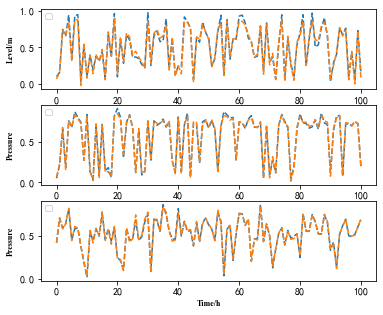

In [71]:
font1 = {'family' : 'Times New Roman',
        'weight' : 'normal',
        'size'   : 8,
            }

f, axes = plt.subplots(3,figsize = (6,5))
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
comparison0 = pd.DataFrame({'original' : np.array(X1)[:,1],
                           'predict' : np.array(X1_pre[:,1])})
#comparison0[:101].plot(style = '--', figsize=(4, 1))
axes[0].plot(comparison0[:101],linestyle = '--')
#axes[0].fill_between(Yhat3.index, Yhat3.values, where=Yhat3.values <=1, interpolate=True, color='r')
#axes[0].plot(Y3, color = 'b', alpha = 0.75, lw = 2, label = 'real label')
#axes[0].set_title('T1',font1)
#axes[0].set_xlabel('Time/h',font2)
axes[0].set_ylabel('Level/m',font1)
axes[0].legend(loc='upper left',prop=font1)

comparison1 = pd.DataFrame({'original' : np.array(X1)[:,32],
                           'predict' : np.array(X1_pre[:,32])})
axes[1].plot(comparison1[:101],linestyle = '--')
#axes[1].set_title('PU1', font1)
axes[1].set_ylabel('Pressure',font1)
#axes[1].legend(fontsize = 10, loc = 'upper left', bbox_to_anchor=(1.05,1.0),borderaxespad = 0.)
axes[1].legend(loc='upper left',prop=font1)

             
comparison2 = pd.DataFrame({'original' : np.array(X1)[:,33],
                           'predict' : np.array(X1_pre[:,33])})
axes[2].plot(comparison2[:101],linestyle = '--')
#axes[2].set_title('PU2', font1)
axes[2].set_xlabel('Time/h',font1)
axes[2].set_ylabel('Pressure',font1)
#axes[2].set_yticks([0,1])
#axes[2].set_yticklabels(['No attack','Attack'],font1)
#axes[1].legend(fontsize = 10, loc = 'upper left', bbox_to_anchor=(1.05,1.0),borderaxespad = 0.)
axes[2].legend(loc='upper left',prop=font1)
plt.savefig("Predicted_T1_J280_J269.png", dpi=1000, bbox_inches = 'tight')

In [24]:
def plot_error(error_df, threshold = False, title = 'Residual'):
    # plot the results
    fig, ax = plt.subplots(figsize = (4,1))
    font2 = {'family' : 'Times New Roman',
        'weight' : 'normal',
        'size'   : 8,
            }
    font1 = {'family' : 'Times New Roman',
        'weight' : 'normal',
        'size'   : 6,
            }
    for g, df in error_df.groupby('True_class'):
        ax.plot(df.index, df.Error,
                marker='o', ms=3.5, linestyle='', 
                label = 'Attack' if g == 1 else 'Normal')
    if (isinstance(threshold, float))|(isinstance(threshold, int)):
        ax.hlines(threshold, ax.get_xlim()[0], ax.get_xlim()[1],
                  linestyle = '--', colors='r', label='Threshold')
    ax.legend(loc = 'upper right',prop=font2)
    fig.autofmt_xdate()
    plt.title(title,font2)
    plt.xticks(fontsize=8)
    plt.yticks(fontsize=8)
    plt.ylabel("Residual",font2)
    plt.xlabel("Time/h",font2)
    plt.savefig('attack.png', dpi=1000, bbox_inches = 'tight')

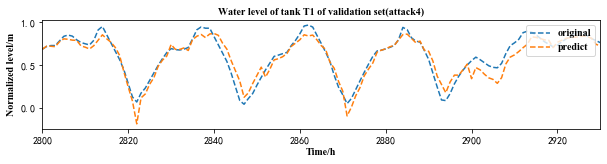

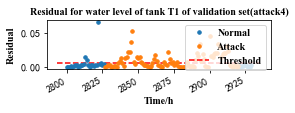

In [31]:
signal = 'validation_L_T1'
font2 = {'family' : 'Times New Roman',
        'weight' : 'normal',
        'size'   : 10,
            }
comparison = pd.DataFrame({'original' : np.array(X3)[:,1],
                           'predict' : np.array(X3_pre[:,1])})
comparison[2800:2931].plot(style = '--', figsize=(10, 2))
plt.title('Water level of tank {}'.format('T1 of validation set(attack4)'),font2)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel('Time/h',font2)
plt.ylabel('Normalized level/m',font2)
plt.legend(loc='upper right',prop=font2)
plt.savefig("T1 of validation set(attack4).png", dpi=1000, bbox_inches = 'tight')
X3_LT1_error = (np.array(X3)[2800:2930,1]-np.array(X3_pre)[2800:2930,1])**2
#print(X3_LT1_error,X3_LT1_error.shape)#100x1

font2 = {'family' : 'Times New Roman',
        'weight' : 'normal',
        'size'   : 10,
            }
error_df = pd.DataFrame({'Error': X3_LT1_error,
                         'True_class': df_test_01.ATT_FLAG[2800:2930]})
plot_error(error_df, threshold=5.0e-3, 
           title='Residual for water level of tank {}'.format('T1 of validation set(attack4)'))

C:\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


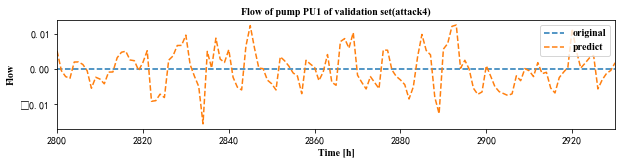

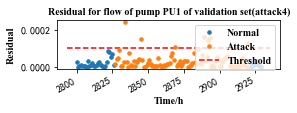

In [32]:
font2 = {'family' : 'Times New Roman',
        'weight' : 'normal',
        'size'   : 10,
            }
comparison = pd.DataFrame({'original' : np.array(X3)[:,8],
                           'predict' : np.array(X3_pre[:,8])})
comparison[2800:2931].plot(style = '--', figsize=(10, 2))
plt.title('Flow of pump {}'.format('PU1 of validation set(attack4)'),font2)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel("Time [h]",font2)
plt.ylabel('Flow',font2)
plt.legend(loc='upper right',prop=font2)
plt.savefig("PU1 of validation set(attack4).png", dpi=1000, bbox_inches = 'tight')
X3_PU1_error = (np.array(X3)[2800:2930,8]-np.array(X3_pre)[2800:2930,8])**2
#print(X3_LT1_error,X3_LT1_error.shape)#100x1
error_df = pd.DataFrame({'Error': X3_PU1_error,
                         'True_class': df_test_01.ATT_FLAG[2800:2930]})
plot_error(error_df, threshold=0.1e-3, 
           title='Residual for flow of pump {}'.format('PU1 of validation set(attack4)'))

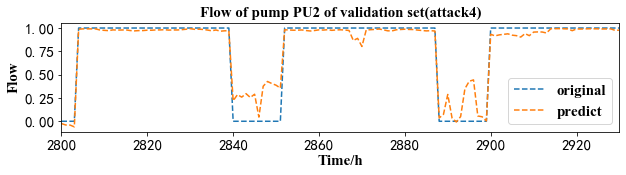

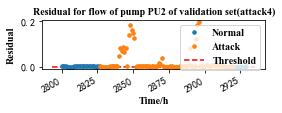

In [33]:
font2 = {'family' : 'Times New Roman',
        'weight' : 'normal',
        'size'   : 15,
            }
comparison = pd.DataFrame({'original' : np.array(X3)[:,10],
                           'predict' : np.array(X3_pre[:,10])})
comparison[2800:2931].plot(style = '--', figsize=(10, 2))
plt.title('Flow of pump {}'.format('PU2 of validation set(attack4)'),font2)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel("Time/h",font2)
plt.ylabel('Flow',font2)
plt.legend(loc='lower right',prop=font2)
plt.savefig("PU2 of validation set(attack4).png", dpi=1000, bbox_inches = 'tight')
X3_PU2_error = (np.array(X3)[2800:2930,10]-np.array(X3_pre)[2800:2930,10])**2
#print(X3_LT1_error,X3_LT1_error.shape)#100x1
error_df = pd.DataFrame({'Error': X3_PU2_error,
                         'True_class': df_test_01.ATT_FLAG[2800:2930]})
plot_error(error_df, threshold=0.1e-3, 
           title='Residual for flow of pump {}'.format('PU2 of validation set(attack4)'))

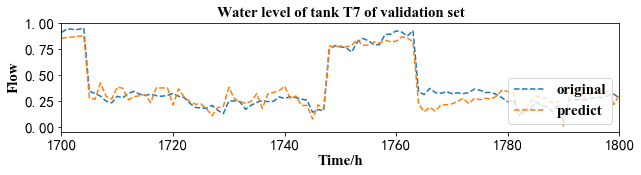

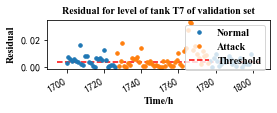

In [34]:
font2 = {'family' : 'Times New Roman',
        'weight' : 'normal',
        'size'   : 15,
            }
comparison = pd.DataFrame({'original' : np.array(X3)[:,7],
                           'predict' : np.array(X3_pre[:,7])})
comparison[1700:1801].plot(style = '--', figsize=(10, 2))
plt.title('Water level of tank {}'.format('T7 of validation set'),font2)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('Time/h',font2)
plt.ylabel('Flow',font2)
plt.legend(loc='lower right',prop=font2)

X3_F_PU1_error = (np.array(X3)[1700:1800,7]-np.array(X3_pre)[1700:1800,7])**2
#print(X3_LT1_error,X3_LT1_error.shape)#100x1
error_df = pd.DataFrame({'Error': X3_F_PU1_error,
                         'True_class': df_test_01.ATT_FLAG[1700:1800]})
plot_error(error_df, threshold=3.5e-3, 
           title='Residual for level of tank {}'.format('T7 of validation set'))

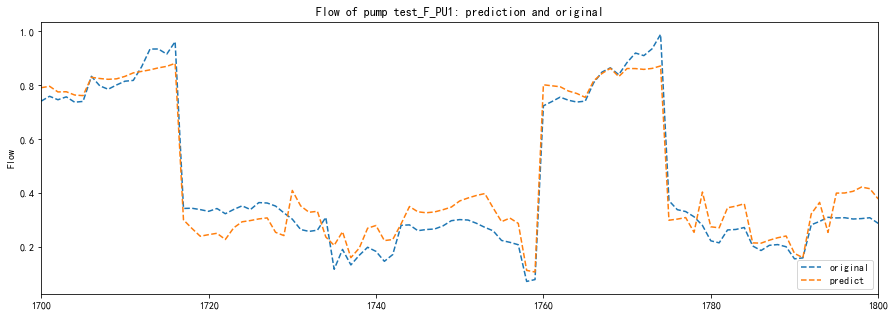

In [35]:
comparison = pd.DataFrame({'original' : np.array(X4)[:,7],
                           'predict' : np.array(X4_pre[:,7])})
comparison[1700:1801].plot(style = '--', figsize=(15, 5))
plt.title('Flow of pump {}: prediction and original'.format('test_F_PU1'))
plt.ylabel('Flow')
plt.legend(loc='lower right')

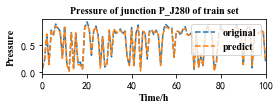

In [254]:
font2 = {'family' : 'Times New Roman',
        'weight' : 'normal',
        'size'   : 10,
            }
comparison = pd.DataFrame({'original' : np.array(X1)[:,32],
                           'predict' : np.array(X1_pre[:,32])})
comparison[:101].plot(style = '--', figsize=(4, 1))
plt.title('Pressure of junction {}'.format('P_J280 of train set'),font2)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel('Time/h',font2)
plt.ylabel('Pressure',font2)
plt.legend(loc='upper right',prop=font2)
plt.savefig("P_J280 of train set.png", dpi=1000, bbox_inches = 'tight')

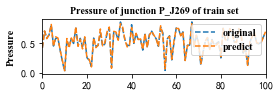

In [37]:
font2 = {'family' : 'Times New Roman',
        'weight' : 'normal',
        'size'   : 10,
            }
comparison = pd.DataFrame({'original' : np.array(X1)[:,33],
                           'predict' : np.array(X1_pre[:,33])})
comparison[:101].plot(style = '--', figsize=(4, 1))
plt.title('Pressure of junction {}'.format('P_J269 of train set'),font2)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
#plt.xlabel('Time/h',font2)
plt.ylabel('Pressure',font2)
plt.legend(loc='upper right',prop=font2)
plt.savefig("P_J269 of train set.png", dpi=1000, bbox_inches = 'tight')

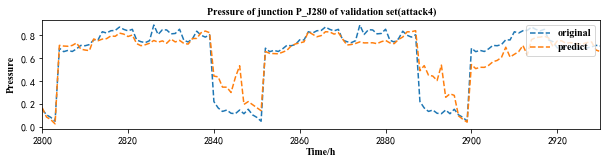

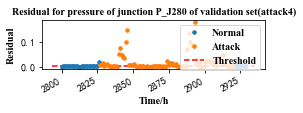

In [38]:
font2 = {'family' : 'Times New Roman',
        'weight' : 'normal',
        'size'   : 10,
            }
comparison = pd.DataFrame({'original' : np.array(X3)[:,32],
                           'predict' : np.array(X3_pre[:,32])})
comparison[2800:2931].plot(style = '--', figsize=(10, 2))
plt.title('Pressure of junction {}'.format('P_J280 of validation set(attack4)'),font2)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel('Time/h',font2)
plt.ylabel('Pressure',font2)
plt.legend(loc='upper right',prop=font2)
plt.savefig("P_J280 of validation set(attack4).png", dpi=1000, bbox_inches = 'tight')
X3_P_J280_error = (np.array(X3)[2800:2930,32]-np.array(X3_pre)[2800:2930,32])**2
#print(X3_LT1_error,X3_LT1_error.shape)#100x1
error_df = pd.DataFrame({'Error': X3_P_J280_error,
                         'True_class': df_test_01.ATT_FLAG[2800:2930]})
plot_error(error_df, threshold=1.5e-3, 
           title='Residual for pressure of junction {}'.format('P_J280 of validation set(attack4)'))

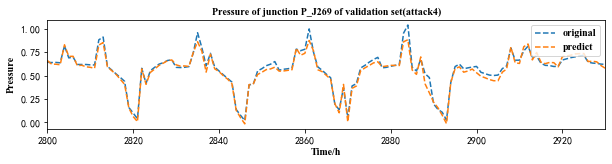

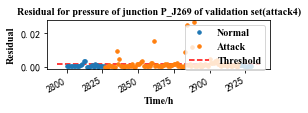

In [39]:
font2 = {'family' : 'Times New Roman',
        'weight' : 'normal',
        'size'   : 10,
            }
comparison = pd.DataFrame({'original' : np.array(X3)[:,33],
                           'predict' : np.array(X3_pre[:,33])})
comparison[2800:2931].plot(style = '--', figsize=(10, 2))
plt.title('Pressure of junction {}'.format('P_J269 of validation set(attack4)'),font2)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel('Time/h',font2)
plt.ylabel('Pressure',font2)
plt.legend(loc='upper right',prop=font2)
plt.savefig("P_J269 of validation set(attack4).png", dpi=1000, bbox_inches = 'tight')

X3_P_J269_error = (np.array(X3)[2800:2930,33]-np.array(X3_pre)[2800:2930,33])**2
#print(X3_LT1_error,X3_LT1_error.shape)#100x1
error_df = pd.DataFrame({'Error': X3_P_J269_error,
                         'True_class': df_test_01.ATT_FLAG[2800:2930]})
plot_error(error_df, threshold=1.5e-3, 
           title='Residual for pressure of junction {}'.format('P_J269 of validation set(attack4)'))

In [43]:
def no_attack_plot_error(error_df, threshold = False, title = 'Residual'):
    # plot the results
    fig, ax = plt.subplots(figsize = (4,1))
    font2 = {'family' : 'Times New Roman',
        'weight' : 'normal',
        'size'   : 10,
            }
    font1 = {'family' : 'Times New Roman',
        'weight' : 'normal',
        'size'   : 8,
            }
    for g, df in error_df.groupby('True_class'):
        ax.plot(df.index, df.Error,
                marker='o', ms=3.5, linestyle='',color='steelblue')
    #ax.legend(loc = 'upper right',prop=font2)
    fig.autofmt_xdate()
    plt.title(title,font1)
    plt.xticks(fontsize=8)
    plt.yticks(fontsize=8)
    plt.ylabel("Residual",font1)
    plt.xlabel("Time/h",font1)
    plt.savefig("no_attack.png", dpi=1000, bbox_inches = 'tight')

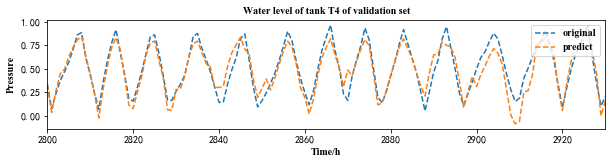

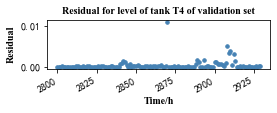

In [41]:
font2 = {'family' : 'Times New Roman',
        'weight' : 'normal',
        'size'   : 10,
            }
comparison = pd.DataFrame({'original' : np.array(X3)[:,4],
                           'predict' : np.array(X3_pre[:,4])})
comparison[2800:2931].plot(style = '--', figsize=(10, 2))
plt.title('Water level of tank {}'.format('T4 of validation set'),font2)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel('Time/h',font2)
plt.ylabel('Pressure',font2)
plt.legend(loc='upper right',prop=font2)
plt.savefig("T4 of validation set(no attack).png", dpi=1000, bbox_inches = 'tight')

X3_P_J269_error = (np.array(X3)[2800:2930,4]-np.array(X3_pre)[2800:2930,4])**4
#print(X3_LT1_error,X3_LT1_error.shape)#100x1
error_df = pd.DataFrame({'Error': X3_P_J269_error,
                         'True_class': df_test_01.ATT_FLAG[2800:2930]})
no_attack_plot_error(error_df,threshold = False,title='Residual for level of tank {}'.format('T4 of validation set'))

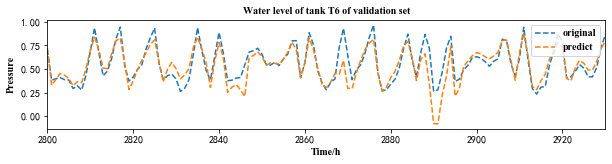

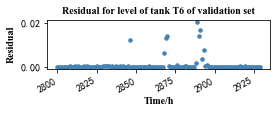

In [42]:
font2 = {'family' : 'Times New Roman',
        'weight' : 'normal',
        'size'   : 10,
            }
comparison = pd.DataFrame({'original' : np.array(X3)[:,6],
                           'predict' : np.array(X3_pre[:,6])})
comparison[2800:2931].plot(style = '--', figsize=(10, 2))
plt.title('Water level of tank {}'.format('T6 of validation set'),font2)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel('Time/h',font2)
plt.ylabel('Pressure',font2)
plt.legend(loc='upper right',prop=font2)
plt.savefig("T6 of validation set(no attack).png", dpi=1000, bbox_inches = 'tight')

X3_P_J269_error = (np.array(X3)[2800:2930,6]-np.array(X3_pre)[2800:2930,6])**4
#print(X3_LT1_error,X3_LT1_error.shape)#100x1
error_df = pd.DataFrame({'Error': X3_P_J269_error,
                         'True_class': df_test_01.ATT_FLAG[2800:2930]})
no_attack_plot_error(error_df,threshold = False,title='Residual for level of tank {}'.format('T6 of validation set'))

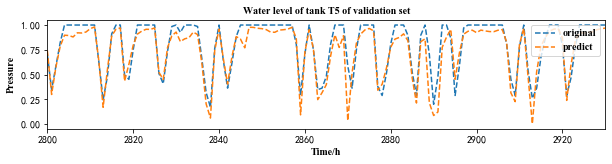

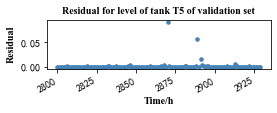

In [43]:
font2 = {'family' : 'Times New Roman',
        'weight' : 'normal',
        'size'   : 10,
            }
comparison = pd.DataFrame({'original' : np.array(X3)[:,5],
                           'predict' : np.array(X3_pre[:,5])})
comparison[2800:2931].plot(style = '--', figsize=(10, 2))
plt.title('Water level of tank {}'.format('T5 of validation set'),font2)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel('Time/h',font2)
plt.ylabel('Pressure',font2)
plt.legend(loc='upper right',prop=font2)
plt.savefig("T5 of validation set(no attack).png", dpi=1000, bbox_inches = 'tight')

X3_P_J269_error = (np.array(X3)[2800:2930,5]-np.array(X3_pre)[2800:2930,5])**4
#print(X3_LT1_error,X3_LT1_error.shape)#100x1
error_df = pd.DataFrame({'Error': X3_P_J269_error,
                         'True_class': df_test_01.ATT_FLAG[2800:2930]})
no_attack_plot_error(error_df,threshold = False,title='Residual for level of tank {}'.format('T5 of validation set'))

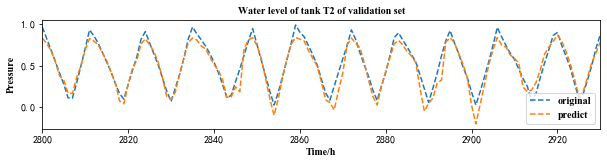

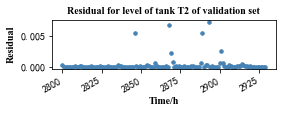

In [44]:
font2 = {'family' : 'Times New Roman',
        'weight' : 'normal',
        'size'   : 10,
            }
comparison = pd.DataFrame({'original' : np.array(X3)[:,2],
                           'predict' : np.array(X3_pre[:,2])})
comparison[2800:2931].plot(style = '--', figsize=(10, 2))
plt.title('Water level of tank {}'.format('T2 of validation set'),font2)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel('Time/h',font2)
plt.ylabel('Pressure',font2)
plt.legend(loc='lower right',prop=font2)
plt.savefig("T2 of validation set(no attack).png", dpi=1000, bbox_inches = 'tight')

X3_P_J269_error = (np.array(X3)[2800:2930,2]-np.array(X3_pre)[2800:2930,2])**4
#print(X3_LT1_error,X3_LT1_error.shape)#100x1
error_df = pd.DataFrame({'Error': X3_P_J269_error,
                         'True_class': df_test_01.ATT_FLAG[2800:2930]})
no_attack_plot_error(error_df,threshold = False,title='Residual for level of tank {}'.format('T2 of validation set'))

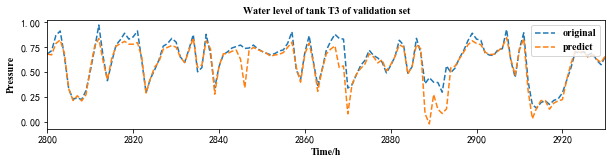

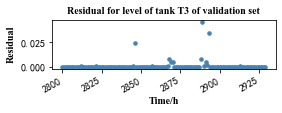

In [45]:
font2 = {'family' : 'Times New Roman',
        'weight' : 'normal',
        'size'   : 10,
            }
comparison = pd.DataFrame({'original' : np.array(X3)[:,3],
                           'predict' : np.array(X3_pre[:,3])})
comparison[2800:2931].plot(style = '--', figsize=(10, 2))
plt.title('Water level of tank {}'.format('T3 of validation set'),font2)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel('Time/h',font2)
plt.ylabel('Pressure',font2)
plt.legend(loc='upper right',prop=font2)
plt.savefig("T3 of validation set(no attack).png", dpi=1000, bbox_inches = 'tight')
X3_T3_error = (np.array(X3)[2800:2930,3]-np.array(X3_pre)[2800:2930,3])**4
#print(X3_LT1_error,X3_LT1_error.shape)#100x1
error_df = pd.DataFrame({'Error': X3_T3_error,
                         'True_class': df_test_01.ATT_FLAG[2800:2930]})
no_attack_plot_error(error_df,threshold = False,title='Residual for level of tank {}'.format('T3 of validation set'))

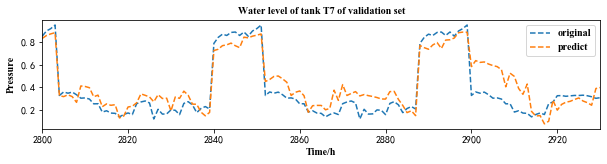

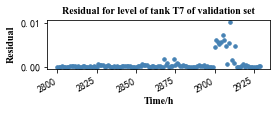

In [46]:
font2 = {'family' : 'Times New Roman',
        'weight' : 'normal',
        'size'   : 10,
            }
comparison = pd.DataFrame({'original' : np.array(X3)[:,7],
                           'predict' : np.array(X3_pre[:,7])})
comparison[2800:2931].plot(style = '--', figsize=(10, 2))
plt.title('Water level of tank {}'.format('T7 of validation set'),font2)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel('Time/h',font2)
plt.ylabel('Pressure',font2)
plt.legend(loc='upper right',prop=font2)
plt.savefig("T7 of validation set(no attack).png", dpi=1000, bbox_inches = 'tight')

X3_T7_error = (np.array(X3)[2800:2930,7]-np.array(X3_pre)[2800:2930,7])**4
#print(X3_LT1_error,X3_LT1_error.shape)#100x1
error_df = pd.DataFrame({'Error': X3_T7_error,
                         'True_class': df_test_01.ATT_FLAG[2800:2930]})
no_attack_plot_error(error_df,threshold = False,title='Residual for level of tank {}'.format('T7 of validation set'))

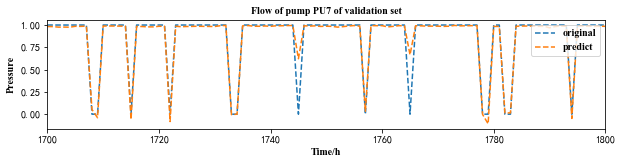

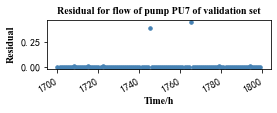

In [47]:
font2 = {'family' : 'Times New Roman',
        'weight' : 'normal',
        'size'   : 10,
            }
comparison = pd.DataFrame({'original' : np.array(X3)[:,20],
                           'predict' : np.array(X3_pre[:,20])})
comparison[1700:1801].plot(style = '--', figsize=(10, 2))
plt.title('Flow of pump {}'.format('PU7 of validation set'),font2)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel('Time/h',font2)
plt.ylabel('Pressure',font2)
plt.legend(loc='upper right',prop=font2)
plt.savefig("PU7 of validation set(no attack).png", dpi=1000, bbox_inches = 'tight')

X3_P_J269_error = (np.array(X3)[1700:1800,20]-np.array(X3_pre)[1700:1800,20])**2
#print(X3_LT1_error,X3_LT1_error.shape)#100x1
error_df = pd.DataFrame({'Error': X3_P_J269_error,
                         'True_class': df_test_01.ATT_FLAG[1700:1800]})
no_attack_plot_error(error_df,threshold = False,title='Residual for flow of pump {}'.format('PU7 of validation set'))

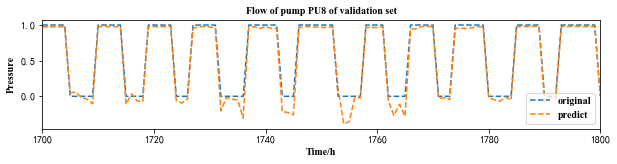

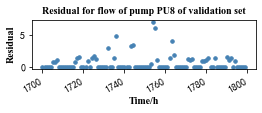

In [48]:
font2 = {'family' : 'Times New Roman',
        'weight' : 'normal',
        'size'   : 10,
            }
comparison = pd.DataFrame({'original' : np.array(X3)[:,22],
                           'predict' : np.array(X3_pre[:,22])})
comparison[1700:1801].plot(style = '--', figsize=(10, 2))
plt.title('Flow of pump {}'.format('PU8 of validation set'),font2)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel('Time/h',font2)
plt.ylabel('Pressure',font2)
plt.legend(loc='lower right',prop=font2)


X3_P_J269_error = (np.array(X3)[1700:1800,20]-np.array(X3_pre)[1700:1800,22])**6
#print(X3_LT1_error,X3_LT1_error.shape)#100x1
error_df = pd.DataFrame({'Error': X3_P_J269_error,
                         'True_class': df_test_01.ATT_FLAG[1700:1800]})
no_attack_plot_error(error_df,threshold = False,title='Residual for flow of pump {}'.format('PU8 of validation set'))

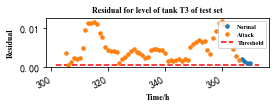

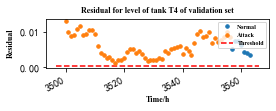

In [98]:
#only pump(T3,T4)
X4_T3_error_ = (np.array(X4)[300:371,3]-np.array(X4_pre)[300:371,3])**2
X3_T4_error_ = (np.array(X3)[3495:3564,4]-np.array(X3_pre)[3495:3564,4])**2
font2 = {'family' : 'Times New Roman',
        'weight' : 'normal',
        'size'   : 8,
            }
font1 = {'family' : 'Times New Roman',
        'weight' : 'normal',
        'size'   : 6,
            }
errors0 = pd.DataFrame({'X4_T3_error_' :X4_T3_error_
                           })
errors0_ = errors0.mean(axis=1).rolling(window=6).mean()
errors0_ = np.array(errors0_)
#print(errors_)

error_df0 = pd.DataFrame({'Error': errors0_,
                         'True_class': df_test_02.ATT_FLAG[300:371]})
#print(error_df)
plot_error(error_df0,threshold = 5e-4,title='Residual for level of tank {}'.format('T3 of test set'))


errors1 = pd.DataFrame({'X3_T4_error_' :X3_T4_error_
                           })
errors1_ = errors1.mean(axis=1).rolling(window=6).mean()
errors1_ = np.array(errors1_)
#print(errors_)

error_df1 = pd.DataFrame({'Error': errors1_,
                         'True_class': df_test_01.ATT_FLAG[3495:3564]})
#print(error_df)
plot_error(error_df1,threshold = 5e-4,title='Residual for level of tank {}'.format('T4 of validation set'))

In [ ]:
#only junction(T1,T7)


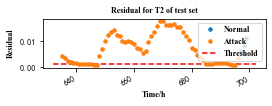

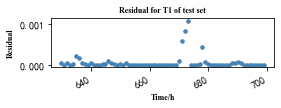

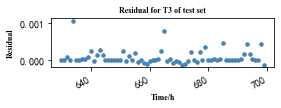

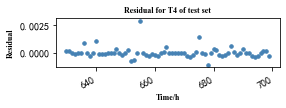

In [43]:
#only valve(T2)
X4_V2_error0_ = (np.array(X3)[630:700,2]-np.array(X3_pre)[630:700,2])**2
X4_S_V2_error0_ = (np.array(X3)[630:700,31]-np.array(X3_pre)[630:700,31])**2
font2 = {'family' : 'Times New Roman',
        'weight' : 'normal',
        'size'   : 8,
            }
font1 = {'family' : 'Times New Roman',
        'weight' : 'normal',
        'size'   : 6,
            }
errors00 = pd.DataFrame({'X4_V2_error_' :X4_V2_error0_,
                         'X4_S_V2_error_' :X4_S_V2_error0_
                           })
errors00_ = errors00.mean(axis=1).rolling(window=6).mean()
errors00_ = np.array(errors00_)
#print(errors_)

error_df00 = pd.DataFrame({'Error': errors00_,
                         'True_class': df_test_02.ATT_FLAG[630:700]})
#print(error_df)
plot_error(error_df00,threshold = 1e-3,title='Residual for {}'.format('T2 of test set'))


X4_P_J29_error = (np.array(X4)[630:700,1]-np.array(X4_pre)[630:700,1])**4
#print(X3_LT1_error,X3_LT1_error.shape)#100x1
error_df = pd.DataFrame({'Error': X4_P_J29_error,
                         'True_class': df_test_02.ATT_FLAG[630:700]})
no_attack_plot_error(error_df,threshold = False,title='Residual for {}'.format('T1 of test set'))


X4_P_J9_error = (np.array(X4)[630:700,3]-np.array(X4_pre)[630:700,3])**3
#print(X3_LT1_error,X3_LT1_error.shape)#100x1
error_df = pd.DataFrame({'Error': X4_P_J9_error,
                         'True_class': df_test_02.ATT_FLAG[630:700]})
no_attack_plot_error(error_df,threshold = False,title='Residual for {}'.format('T3 of test set'))


X4_P_J_error = (np.array(X4)[630:700,4]-np.array(X4_pre)[630:700,4])**3
#print(X3_LT1_error,X3_LT1_error.shape)#100x1
error_df = pd.DataFrame({'Error': X4_P_J_error,
                         'True_class': df_test_02.ATT_FLAG[630:700]})
no_attack_plot_error(error_df,threshold = False,title='Residual for {}'.format('T4 of test set'))

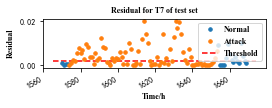

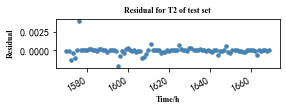

In [255]:
X4_T7_error = (np.array(X4)[1570:1670,7]-np.array(X4_pre)[1570:1670,7])**2
#print(X3_LT1_error,X3_LT1_error.shape)#100x1
error_df = pd.DataFrame({'Error': X4_T7_error,
                         'True_class': df_test_02.ATT_FLAG[1570:1670]})
plot_error(error_df,threshold = 2e-3,title='Residual for {}'.format('T7 of test set'))

X4_T2_error = (np.array(X4)[1570:1670,2]-np.array(X4_pre)[1570:1670,2])**3
#print(X3_LT1_error,X3_LT1_error.shape)#100x1
error_df = pd.DataFrame({'Error': X4_T2_error,
                         'True_class': df_test_02.ATT_FLAG[1570:1670]})
no_attack_plot_error(error_df,threshold = False,title='Residual for {}'.format('T2 of test set'))

In [111]:
#X3_LT1_error
#X3_PU1_error
#X3_P_J269_error
#X3_P_J280_error
font2 = {'family' : 'Times New Roman',
        'weight' : 'normal',
        'size'   : 10,
            }
errors = pd.DataFrame({'X3_LT1_error' : X3_LT1_error,
                           'X3_PU1_error' : X3_PU1_error,
                       'X3_PU2_error' : X3_PU2_error,
                      'X3_P_J269_error' : X3_P_J269_error,
                      'X3_P_J280_error' : X3_P_J280_error})
#print(errors)

#errors_ = errors.mean(axis=1).rolling(window=1).mean()
#errors_ = errors.mean(axis=1).rolling(window=3).mean()
errors_ = errors.mean(axis=1).rolling(window=6).mean()
errors_ = np.array(errors_)
#print(errors_)

error_df = pd.DataFrame({'Error': errors_,
                         'True_class': df_test_01.ATT_FLAG[2800:2930]})
#print(error_df)
plot_error(error_df, threshold=4.0e-3, 
           title='Residual for {}: original vs prediction'.format('attack4 of validation set(window size=6)'))

ValueError: arrays must all be same length

In [ ]:
#signal = 'validation_L_T1'
font2 = {'family' : 'Times New Roman',
        'weight' : 'normal',
        'size'   : 10,
            }
comparison = pd.DataFrame({'original' : np.array(X3)[:,7],
                           'predict' : np.array(X3_pre[:,7])})
comparison[1700:1801].plot(style = '--', figsize=(10, 2))
plt.title('Water level of tank {}'.format('T7 of validation set(attack1)'),font2)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel('Time/h',font2)
plt.ylabel('Normalized level/m',font2)
plt.legend(loc='upper right',prop=font2)
plt.savefig("T7 of validation set(attack1).png", dpi=1000, bbox_inches = 'tight')
X3_LT7_error = (np.array(X3)[1700:1800,7]-np.array(X3_pre)[1700:1800,7])**2
#print(X3_LT1_error,X3_LT1_error.shape)#100x1

font2 = {'family' : 'Times New Roman',
        'weight' : 'normal',
        'size'   : 10,
            }
error_df = pd.DataFrame({'Error': X3_LT7_error,
                         'True_class': df_test_01.ATT_FLAG[1700:1800]})
plot_error(error_df, threshold=5.0e-3, 
           title='Residual for water level of tank {}'.format('T7 of validation set(attack1)'))

In [ ]:
font2 = {'family' : 'Times New Roman',
        'weight' : 'normal',
        'size'   : 10,
            }
comparison = pd.DataFrame({'original' : np.array(X3)[:,26],
                           'predict' : np.array(X3_pre[:,26])})
comparison[1700:1801].plot(style = '--', figsize=(10, 2))
plt.title('Flow of pump {}'.format('PU10 of validation set(attack1)'),font2)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel('Time/h',font2)
plt.ylabel('Flow',font2)
plt.legend(loc='upper right',prop=font2)
plt.savefig("PU10 of validation set(attack1).png", dpi=1000, bbox_inches = 'tight')

X3_PU10_error = (np.array(X3)[1700:1800,26]-np.array(X3_pre)[1700:1800,26])**2
#print(X3_LT1_error,X3_LT1_error.shape)#100x1
error_df = pd.DataFrame({'Error': X3_PU10_error,
                         'True_class': df_test_01.ATT_FLAG[1700:1800]})
plot_error(error_df,threshold = 5.0e-3,title='Residual for flow of pump {}'.format('PU10 of validation set(attack1)'))

In [ ]:
font2 = {'family' : 'Times New Roman',
        'weight' : 'normal',
        'size'   : 10,
            }
comparison = pd.DataFrame({'original' : np.array(X3)[:,28],
                           'predict' : np.array(X3_pre[:,28])})
comparison[1700:1801].plot(style = '--', figsize=(10, 2))
plt.title('Flow of pump {}'.format('PU11 of validation set(attack1)'),font2)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel('Time/h',font2)
plt.ylabel('Flow',font2)
plt.legend(loc='upper right',prop=font2)
plt.savefig("PU11 of validation set(attack1).png", dpi=1000, bbox_inches = 'tight')

X3_PU11_error = (np.array(X3)[1700:1800,28]-np.array(X3_pre)[1700:1800,28])**2
#print(X3_LT1_error,X3_LT1_error.shape)#100x1
error_df = pd.DataFrame({'Error': X3_PU11_error,
                         'True_class': df_test_01.ATT_FLAG[1700:1800]})
plot_error(error_df,threshold = 5.0e-3,title='Residual for flow of pump {}'.format('PU11 of validation set(attack1)'))

In [ ]:
errors = pd.DataFrame({'X3_LT7_error' : X3_LT7_error,
                           'X3_PU10_error' : X3_PU10_error,
                       'X3_PU11_error' : X3_PU11_error})
#print(errors)

#errors_ = errors.mean(axis=1).rolling(window=1).mean()
#errors_ = errors.mean(axis=1).rolling(window=3).mean()
errors_ = errors.mean(axis=1).rolling(window=6).mean()
errors_ = np.array(errors_)
#print(errors_)

error_df = pd.DataFrame({'Error': errors_,
                         'True_class': df_test_01.ATT_FLAG[1700:1800]})
#print(error_df)
plot_error(error_df, threshold=4.0e-3, 
           title='Residual for {}: original vs prediction'.format('attack1 of validation set(window size=6)'))

In [ ]:
font2 = {'family' : 'Times New Roman',
        'weight' : 'normal',
        'size'   : 10,
            }
comparison = pd.DataFrame({'original' : np.array(X3)[:,1],
                           'predict' : np.array(X3_pre[:,1])})
comparison[1700:1801].plot(style = '--', figsize=(10, 2))
plt.title('Water level of tank {}'.format('T1 of validation set'),font2)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel('Time/h',font2)
plt.ylabel('Level/m',font2)
plt.legend(loc='upper right',prop=font2)
plt.savefig("T1 of validation set(no attack).png", dpi=1000, bbox_inches = 'tight')

X3_T1_no_error = (np.array(X3)[1700:1800,1]-np.array(X3_pre)[1700:1800,1])**4
#print(X3_LT1_error,X3_LT1_error.shape)#100x1
error_df = pd.DataFrame({'Error': X3_T1_no_error,
                         'True_class': df_test_01.ATT_FLAG[1700:1800]})
no_attack_plot_error(error_df,threshold = False,title='Residual for level of tank {}'.format('T1 of validation set'))

In [ ]:
font2 = {'family' : 'Times New Roman',
        'weight' : 'normal',
        'size'   : 10,
            }
comparison = pd.DataFrame({'original' : np.array(X3)[:,2],
                           'predict' : np.array(X3_pre[:,2])})
comparison[1700:1801].plot(style = '--', figsize=(10, 2))
plt.title('Water level of tank {}'.format('T2 of validation set'),font2)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel('Time/h',font2)
plt.ylabel('Level/m',font2)
plt.legend(loc='upper right',prop=font2)
plt.savefig("T2 of validation set(no attack).png", dpi=1000, bbox_inches = 'tight')

X3_T2_no_error = (np.array(X3)[1700:1800,2]-np.array(X3_pre)[1700:1800,2])**6
#print(X3_LT1_error,X3_LT1_error.shape)#100x1
error_df = pd.DataFrame({'Error': X3_T2_no_error,
                         'True_class': df_test_01.ATT_FLAG[1700:1800]})
no_attack_plot_error(error_df,threshold = False,title='Residual for level of tank {}'.format('T2 of validation set'))

In [ ]:
font2 = {'family' : 'Times New Roman',
        'weight' : 'normal',
        'size'   : 10,
            }
comparison = pd.DataFrame({'original' : np.array(X3)[:,3],
                           'predict' : np.array(X3_pre[:,3])})
comparison[1700:1801].plot(style = '--', figsize=(10, 2))
plt.title('Water level of tank {}'.format('T3 of validation set'),font2)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel('Time/h',font2)
plt.ylabel('Level/m',font2)
plt.legend(loc='upper right',prop=font2)
plt.savefig("T3 of validation set(no attack).png", dpi=1000, bbox_inches = 'tight')

X3_T3_no_error = (np.array(X3)[1700:1800,3]-np.array(X3_pre)[1700:1800,3])**4
#print(X3_LT1_error,X3_LT1_error.shape)#100x1
error_df = pd.DataFrame({'Error': X3_T3_no_error,
                         'True_class': df_test_01.ATT_FLAG[1700:1800]})
no_attack_plot_error(error_df,threshold = False,title='Residual for level of tank {}'.format('T3 of validation set'))

In [ ]:
font2 = {'family' : 'Times New Roman',
        'weight' : 'normal',
        'size'   : 10,
            }
comparison = pd.DataFrame({'original' : np.array(X3)[:,4],
                           'predict' : np.array(X3_pre[:,4])})
comparison[1700:1801].plot(style = '--', figsize=(10, 2))
plt.title('Water level of tank {}'.format('T4 of validation set'),font2)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel('Time/h',font2)
plt.ylabel('Level/m',font2)
plt.legend(loc='upper right',prop=font2)
plt.savefig("T4 of validation set(no attack).png", dpi=1000, bbox_inches = 'tight')

X3_T4_no_error = (np.array(X3)[1700:1800,4]-np.array(X3_pre)[1700:1800,4])**4
#print(X3_LT1_error,X3_LT1_error.shape)#100x1
error_df = pd.DataFrame({'Error': X3_T4_no_error,
                         'True_class': df_test_01.ATT_FLAG[1700:1800]})
no_attack_plot_error(error_df,threshold = False,title='Residual for level of tank {}'.format('T4 of validation set'))

In [ ]:
font2 = {'family' : 'Times New Roman',
        'weight' : 'normal',
        'size'   : 10,
            }
comparison = pd.DataFrame({'original' : np.array(X3)[:,5],
                           'predict' : np.array(X3_pre[:,5])})
comparison[1700:1801].plot(style = '--', figsize=(10, 2))
plt.title('Water level of tank {}'.format('T5 of validation set'),font2)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel('Time/h',font2)
plt.ylabel('Level/m',font2)
plt.legend(loc='upper right',prop=font2)
plt.savefig("T5 of validation set(no attack).png", dpi=1000, bbox_inches = 'tight')

X3_T5_no_error = (np.array(X3)[1700:1800,5]-np.array(X3_pre)[1700:1800,5])**4
#print(X3_LT1_error,X3_LT1_error.shape)#100x1
error_df = pd.DataFrame({'Error': X3_T5_no_error,
                         'True_class': df_test_01.ATT_FLAG[1700:1800]})
no_attack_plot_error(error_df,threshold = False,title='Residual for level of tank {}'.format('T5 of validation set'))

In [ ]:
font2 = {'family' : 'Times New Roman',
        'weight' : 'normal',
        'size'   : 10,
            }
comparison = pd.DataFrame({'original' : np.array(X3)[:,6],
                           'predict' : np.array(X3_pre[:,6])})
comparison[1700:1801].plot(style = '--', figsize=(10, 2))
plt.title('Water level of tank {}'.format('T6 of validation set'),font2)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel('Time/h',font2)
plt.ylabel('Level/m',font2)
plt.legend(loc='upper right',prop=font2)
plt.savefig("T6 of validation set(no attack).png", dpi=1000, bbox_inches = 'tight')

X3_T6_no_error = (np.array(X3)[1700:1800,6]-np.array(X3_pre)[1700:1800,6])**4
#print(X3_LT1_error,X3_LT1_error.shape)#100x1
error_df = pd.DataFrame({'Error': X3_T6_no_error,
                         'True_class': df_test_01.ATT_FLAG[1700:1800]})
no_attack_plot_error(error_df,threshold = False,title='Residual for level of tank {}'.format('T6 of validation set'))

In [ ]:
font2 = {'family' : 'Times New Roman',
        'weight' : 'normal',
        'size'   : 10,
            }
comparison = pd.DataFrame({'original' : np.array(X3)[:,4],
                           'predict' : np.array(X3_pre[:,4])})
comparison[3900:4051].plot(style = '--', figsize=(10, 2))
plt.title('Water level of tank {}'.format('T4 of validation set(attack7)'),font2)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel('Time/h',font2)
plt.ylabel('Normalized level/m',font2)
plt.legend(loc='upper right',prop=font2)
plt.savefig("T4 of validation set(attack7).png", dpi=1000, bbox_inches = 'tight')
X3_LT4_error = (np.array(X3)[3900:4050,4]-np.array(X3_pre)[3900:4050,4])**2
#print(X3_LT1_error,X3_LT1_error.shape)#100x1

font2 = {'family' : 'Times New Roman',
        'weight' : 'normal',
        'size'   : 10,
            }
error_df = pd.DataFrame({'Error': X3_LT4_error,
                         'True_class': df_test_01.ATT_FLAG[3900:4050]})
plot_error(error_df, threshold=5.0e-3, 
           title='Residual for water level of tank {}'.format('T4 of validation set(attack7)'))

In [ ]:
font2 = {'family' : 'Times New Roman',
        'weight' : 'normal',
        'size'   : 10,
            }
comparison = pd.DataFrame({'original' : np.array(X3)[:,1],
                           'predict' : np.array(X3_pre[:,1])})
comparison[3900:4051].plot(style = '--', figsize=(10, 2))
plt.title('Water level of tank {}'.format('T1 of validation set'),font2)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel('Time/h',font2)
plt.ylabel('Level/m',font2)
plt.legend(loc='upper right',prop=font2)
plt.savefig("T1 of validation set(no attack).png", dpi=1000, bbox_inches = 'tight')

X3_T1_no_error = (np.array(X3)[3900:4050,1]-np.array(X3_pre)[3900:4050,1])**4
#print(X3_LT1_error,X3_LT1_error.shape)#100x1
error_df = pd.DataFrame({'Error': X3_T1_no_error,
                         'True_class': df_test_01.ATT_FLAG[3900:4050]})
no_attack_plot_error(error_df,threshold = False,title='Residual for level of tank {}'.format('T1 of validation set'))

In [ ]:
font2 = {'family' : 'Times New Roman',
        'weight' : 'normal',
        'size'   : 10,
            }
comparison = pd.DataFrame({'original' : np.array(X3)[:,2],
                           'predict' : np.array(X3_pre[:,2])})
comparison[3900:4051].plot(style = '--', figsize=(10, 2))
plt.title('Water level of tank {}'.format('T2 of validation set'),font2)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel('Time/h',font2)
plt.ylabel('Level/m',font2)
plt.legend(loc='upper right',prop=font2)
plt.savefig("T2 of validation set(no attack).png", dpi=1000, bbox_inches = 'tight')

X3_T2_no_error = (np.array(X3)[3900:4050,2]-np.array(X3_pre)[3900:4050,2])**6
#print(X3_LT1_error,X3_LT1_error.shape)#100x1
error_df = pd.DataFrame({'Error': X3_T2_no_error,
                         'True_class': df_test_01.ATT_FLAG[3900:4050]})
no_attack_plot_error(error_df,threshold = False,title='Residual for level of tank {}'.format('T2 of validation set'))

In [ ]:
font2 = {'family' : 'Times New Roman',
        'weight' : 'normal',
        'size'   : 10,
            }
comparison = pd.DataFrame({'original' : np.array(X3)[:,3],
                           'predict' : np.array(X3_pre[:,3])})
comparison[3900:4051].plot(style = '--', figsize=(10, 2))
plt.title('Water level of tank {}'.format('T3 of validation set'),font2)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel('Time/h',font2)
plt.ylabel('Level/m',font2)
plt.legend(loc='upper right',prop=font2)
plt.savefig("T3 of validation set(no attack).png", dpi=1000, bbox_inches = 'tight')

X3_T3_no_error = (np.array(X3)[3900:4050,3]-np.array(X3_pre)[3900:4050,3])**4
#print(X3_LT1_error,X3_LT1_error.shape)#100x1
error_df = pd.DataFrame({'Error': X3_T3_no_error,
                         'True_class': df_test_01.ATT_FLAG[3900:4050]})
no_attack_plot_error(error_df,threshold = False,title='Residual for level of tank {}'.format('T3 of validation set'))

In [ ]:
font2 = {'family' : 'Times New Roman',
        'weight' : 'normal',
        'size'   : 10,
            }
comparison = pd.DataFrame({'original' : np.array(X3)[:,5],
                           'predict' : np.array(X3_pre[:,5])})
comparison[3900:4051].plot(style = '--', figsize=(10, 2))
plt.title('Water level of tank {}'.format('T5 of validation set'),font2)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel('Time/h',font2)
plt.ylabel('Level/m',font2)
plt.legend(loc='upper right',prop=font2)
plt.savefig("T5 of validation set(no attack).png", dpi=1000, bbox_inches = 'tight')

X3_T5_no_error = (np.array(X3)[3900:4050,5]-np.array(X3_pre)[3900:4050,5])**4
#print(X3_LT1_error,X3_LT1_error.shape)#100x1
error_df = pd.DataFrame({'Error': X3_T5_no_error,
                         'True_class': df_test_01.ATT_FLAG[3900:4050]})
no_attack_plot_error(error_df,threshold = False,title='Residual for level of tank {}'.format('T5 of validation set'))

In [ ]:
font2 = {'family' : 'Times New Roman',
        'weight' : 'normal',
        'size'   : 10,
            }
comparison = pd.DataFrame({'original' : np.array(X3)[:,6],
                           'predict' : np.array(X3_pre[:,6])})
comparison[3900:4051].plot(style = '--', figsize=(10, 2))
plt.title('Water level of tank {}'.format('T6 of validation set'),font2)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel('Time/h',font2)
plt.ylabel('Level/m',font2)
plt.legend(loc='upper right',prop=font2)
plt.savefig("T6 of validation set(no attack).png", dpi=1000, bbox_inches = 'tight')

X3_T6_no_error = (np.array(X3)[3900:4050,6]-np.array(X3_pre)[3900:4050,6])**4
#print(X3_LT1_error,X3_LT1_error.shape)#100x1
error_df = pd.DataFrame({'Error': X3_T6_no_error,
                         'True_class': df_test_01.ATT_FLAG[3900:4050]})
no_attack_plot_error(error_df,threshold = False,title='Residual for level of tank {}'.format('T6 of validation set'))

In [ ]:
font2 = {'family' : 'Times New Roman',
        'weight' : 'normal',
        'size'   : 10,
            }
comparison = pd.DataFrame({'original' : np.array(X3)[:,7],
                           'predict' : np.array(X3_pre[:,7])})
comparison[3900:4051].plot(style = '--', figsize=(10, 2))
plt.title('Water level of tank {}'.format('T7 of validation set'),font2)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel('Time/h',font2)
plt.ylabel('Level/m',font2)
plt.legend(loc='upper right',prop=font2)
plt.savefig("T7 of validation set(no attack).png", dpi=1000, bbox_inches = 'tight')

X3_T7_no_error = (np.array(X3)[3900:4050,7]-np.array(X3_pre)[3900:4050,7])**4
#print(X3_LT1_error,X3_LT1_error.shape)#100x1
error_df = pd.DataFrame({'Error': X3_T7_no_error,
                         'True_class': df_test_01.ATT_FLAG[3900:4050]})
no_attack_plot_error(error_df,threshold = False,title='Residual for level of tank {}'.format('T7 of validation set'))

In [ ]:
font2 = {'family' : 'Times New Roman',
        'weight' : 'normal',
        'size'   : 10,
            }
comparison = pd.DataFrame({'original' : np.array(X4)[:,3],
                           'predict' : np.array(X4_pre[:,3])})
comparison[280:381].plot(style = '--', figsize=(10, 2))
plt.title('Water level of tank {}'.format('T3 of test set(attack8)'),font2)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel('Time/h',font2)
plt.ylabel('Normalized level/m',font2)
plt.legend(loc='upper right',prop=font2)
plt.savefig("T3 of test set(attack8).png", dpi=1000, bbox_inches = 'tight')
X4_LT3_error = (np.array(X4)[280:380,3]-np.array(X4_pre)[280:380,3])**2
#print(X3_LT1_error,X3_LT1_error.shape)#100x1

font2 = {'family' : 'Times New Roman',
        'weight' : 'normal',
        'size'   : 10,
            }
error_df = pd.DataFrame({'Error': X4_LT3_error,
                         'True_class': df_test_02.ATT_FLAG[280:380]})
plot_error(error_df, threshold=5.0e-3, 
           title='Residual for water level of tank {}'.format('T3 of test set(attack8)'))

In [ ]:
font2 = {'family' : 'Times New Roman',
        'weight' : 'normal',
        'size'   : 10,
            }
comparison = pd.DataFrame({'original' : np.array(X4)[:,14],
                           'predict' : np.array(X4_pre[:,14])})
comparison[280:381].plot(style = '--', figsize=(10, 2))
plt.title('Flow of pump {}'.format('PU4 of test set(attack8)'),font2)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel('Time/h',font2)
plt.ylabel('Flow',font2)
plt.legend(loc='upper right',prop=font2)
plt.savefig("PU4 of test set(attack8).png", dpi=1000, bbox_inches = 'tight')

X4_PU4_error = (np.array(X4)[280:380,14]-np.array(X4_pre)[280:380,14])**4
#print(X3_LT1_error,X3_LT1_error.shape)#100x1
error_df = pd.DataFrame({'Error': X4_PU4_error,
                         'True_class': df_test_02.ATT_FLAG[280:380]})
plot_error(error_df,threshold = 1.0e-3,title='Residual for flow of pump {}'.format('PU4 of test set(attack8)'))

In [ ]:
font2 = {'family' : 'Times New Roman',
        'weight' : 'normal',
        'size'   : 10,
            }
comparison = pd.DataFrame({'original' : np.array(X4)[:,16],
                           'predict' : np.array(X4_pre[:,16])})
comparison[280:381].plot(style = '--', figsize=(10, 2))
plt.title('Flow of pump {}'.format('PU5 of test set(attack8)'),font2)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel('Time/h',font2)
plt.ylabel('Flow',font2)
plt.legend(loc='upper right',prop=font2)
plt.savefig("PU5 of test set(attack8).png", dpi=1000, bbox_inches = 'tight')

X4_PU5_error = (np.array(X4)[280:380,16]-np.array(X4_pre)[280:380,16])**4
#print(X3_LT1_error,X3_LT1_error.shape)#100x1
error_df = pd.DataFrame({'Error': X4_PU5_error,
                         'True_class': df_test_02.ATT_FLAG[280:380]})
plot_error(error_df,threshold = 1.0e-3,title='Residual for flow of pump {}'.format('PU5 of test set(attack8)'))

In [ ]:
font2 = {'family' : 'Times New Roman',
        'weight' : 'normal',
        'size'   : 10,
            }
comparison = pd.DataFrame({'original' : np.array(X4)[:,1],
                           'predict' : np.array(X4_pre[:,1])})
comparison[280:381].plot(style = '--', figsize=(10, 2))
plt.title('Water level of tank {}'.format('T1 of test set'),font2)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel('Time/h',font2)
plt.ylabel('Level/m',font2)
plt.legend(loc='upper right',prop=font2)
plt.savefig("T1 of test set(no attack).png", dpi=1000, bbox_inches = 'tight')

X4_T1_no_error = (np.array(X4)[280:380,1]-np.array(X4_pre)[280:380,1])**4
#print(X3_LT1_error,X3_LT1_error.shape)#100x1
error_df = pd.DataFrame({'Error': X4_T1_no_error,
                         'True_class': df_test_02.ATT_FLAG[280:380]})
no_attack_plot_error(error_df,threshold = False,title='Residual for level of tank {}'.format('T1 of test set'))

In [ ]:
font2 = {'family' : 'Times New Roman',
        'weight' : 'normal',
        'size'   : 10,
            }
comparison = pd.DataFrame({'original' : np.array(X4)[:,2],
                           'predict' : np.array(X4_pre[:,2])})
comparison[280:381].plot(style = '--', figsize=(10, 2))
plt.title('Water level of tank {}'.format('T2 of test set'),font2)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel('Time/h',font2)
plt.ylabel('Level/m',font2)
plt.legend(loc='upper right',prop=font2)
plt.savefig("T2 of test set(no attack).png", dpi=1000, bbox_inches = 'tight')

X4_T2_no_error = (np.array(X4)[280:380,2]-np.array(X4_pre)[280:380,2])**4
#print(X3_LT1_error,X3_LT1_error.shape)#100x1
error_df = pd.DataFrame({'Error': X4_T2_no_error,
                         'True_class': df_test_02.ATT_FLAG[280:380]})
no_attack_plot_error(error_df,threshold = False,title='Residual for level of tank {}'.format('T2 of test set'))

In [ ]:
font2 = {'family' : 'Times New Roman',
        'weight' : 'normal',
        'size'   : 10,
            }
comparison = pd.DataFrame({'original' : np.array(X4)[:,4],
                           'predict' : np.array(X4_pre[:,4])})
comparison[280:381].plot(style = '--', figsize=(10, 2))
plt.title('Water level of tank {}'.format('T4 of test set'),font2)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel('Time/h',font2)
plt.ylabel('Level/m',font2)
plt.legend(loc='upper right',prop=font2)
plt.savefig("T4 of test set(no attack).png", dpi=1000, bbox_inches = 'tight')

X4_T4_no_error = (np.array(X4)[280:380,4]-np.array(X4_pre)[280:380,4])**4
#print(X3_LT1_error,X3_LT1_error.shape)#100x1
error_df = pd.DataFrame({'Error': X4_T4_no_error,
                         'True_class': df_test_02.ATT_FLAG[280:380]})
no_attack_plot_error(error_df,threshold = False,title='Residual for level of tank {}'.format('T4 of test set'))

In [ ]:
font2 = {'family' : 'Times New Roman',
        'weight' : 'normal',
        'size'   : 10,
            }
comparison = pd.DataFrame({'original' : np.array(X4)[:,5],
                           'predict' : np.array(X4_pre[:,5])})
comparison[280:381].plot(style = '--', figsize=(10, 2))
plt.title('Water level of tank {}'.format('T5 of test set'),font2)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel('Time/h',font2)
plt.ylabel('Level/m',font2)
plt.legend(loc='upper right',prop=font2)
plt.savefig("T5 of test set(no attack).png", dpi=1000, bbox_inches = 'tight')

X4_T5_no_error = (np.array(X4)[280:380,5]-np.array(X4_pre)[280:380,5])**4
#print(X3_LT1_error,X3_LT1_error.shape)#100x1
error_df = pd.DataFrame({'Error': X4_T5_no_error,
                         'True_class': df_test_02.ATT_FLAG[280:380]})
no_attack_plot_error(error_df,threshold = False,title='Residual for level of tank {}'.format('T5 of test set'))

In [ ]:
font2 = {'family' : 'Times New Roman',
        'weight' : 'normal',
        'size'   : 10,
            }
comparison = pd.DataFrame({'original' : np.array(X4)[:,6],
                           'predict' : np.array(X4_pre[:,6])})
comparison[280:381].plot(style = '--', figsize=(10, 2))
plt.title('Water level of tank {}'.format('T6 of test set'),font2)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel('Time/h',font2)
plt.ylabel('Level/m',font2)
plt.legend(loc='upper right',prop=font2)
plt.savefig("T6 of test set(no attack).png", dpi=1000, bbox_inches = 'tight')

X4_T6_no_error = (np.array(X4)[280:380,6]-np.array(X4_pre)[280:380,6])**4
#print(X3_LT1_error,X3_LT1_error.shape)#100x1
error_df = pd.DataFrame({'Error': X4_T6_no_error,
                         'True_class': df_test_02.ATT_FLAG[280:380]})
no_attack_plot_error(error_df,threshold = False,title='Residual for level of tank {}'.format('T6 of test set'))

In [ ]:
font2 = {'family' : 'Times New Roman',
        'weight' : 'normal',
        'size'   : 10,
            }
comparison = pd.DataFrame({'original' : np.array(X4)[:,7],
                           'predict' : np.array(X4_pre[:,7])})
comparison[280:381].plot(style = '--', figsize=(10, 2))
plt.title('Water level of tank {}'.format('T7 of test set'),font2)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel('Time/h',font2)
plt.ylabel('Level/m',font2)
plt.legend(loc='upper right',prop=font2)
plt.savefig("T7 of test set(no attack).png", dpi=1000, bbox_inches = 'tight')

X4_T7_no_error = (np.array(X4)[280:380,7]-np.array(X4_pre)[280:380,7])**4
#print(X3_LT1_error,X3_LT1_error.shape)#100x1
error_df = pd.DataFrame({'Error': X4_T7_no_error,
                         'True_class': df_test_02.ATT_FLAG[280:380]})
no_attack_plot_error(error_df,threshold = False,title='Residual for level of tank {}'.format('T7 of test set'))

In [ ]:
font2 = {'family' : 'Times New Roman',
        'weight' : 'normal',
        'size'   : 10,
            }
comparison = pd.DataFrame({'original' : np.array(X4)[:,2],
                           'predict' : np.array(X4_pre[:,2])})
comparison[620:721].plot(style = '--', figsize=(10, 2))
plt.title('Water level of tank {}'.format('T2 of test set(attack9)'),font2)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel('Time/h',font2)
plt.ylabel('Normalized level/m',font2)
plt.legend(loc='upper right',prop=font2)
plt.savefig("T2 of test set(attack9).png", dpi=1000, bbox_inches = 'tight')
X4_LT2_error = (np.array(X4)[620:720,2]-np.array(X4_pre)[620:720,2])**2
#print(X3_LT1_error,X3_LT1_error.shape)#100x1

font2 = {'family' : 'Times New Roman',
        'weight' : 'normal',
        'size'   : 10,
            }
error_df = pd.DataFrame({'Error': X4_LT2_error,
                         'True_class': df_test_02.ATT_FLAG[620:720]})
plot_error(error_df, threshold=5.0e-3, 
           title='Residual for water level of tank {}'.format('T2 of test set(attack9)'))

In [ ]:
font2 = {'family' : 'Times New Roman',
        'weight' : 'normal',
        'size'   : 10,
            }
comparison = pd.DataFrame({'original' : np.array(X4)[:,30],
                           'predict' : np.array(X4_pre[:,30])})
comparison[620:721].plot(style = '--', figsize=(10, 2))
plt.title('Flow of valve {}'.format('V2 of test set(attack9)'),font2)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel('Time/h',font2)
plt.ylabel('Flow',font2)
plt.legend(loc='upper right',prop=font2)
plt.savefig("V2 of test set(attack9).png", dpi=1000, bbox_inches = 'tight')
X4_V2_error = (np.array(X4)[620:720,30]-np.array(X4_pre)[620:720,30])**2
#print(X3_LT1_error,X3_LT1_error.shape)#100x1

font2 = {'family' : 'Times New Roman',
        'weight' : 'normal',
        'size'   : 10,
            }
error_df = pd.DataFrame({'Error': X4_V2_error,
                         'True_class': df_test_02.ATT_FLAG[620:720]})
plot_error(error_df, threshold=5.0e-3, 
           title='Flow of valve {}'.format('V2 of test set(attack9)'))

In [ ]:
font2 = {'family' : 'Times New Roman',
        'weight' : 'normal',
        'size'   : 10,
            }
comparison = pd.DataFrame({'original' : np.array(X4)[:,1],
                           'predict' : np.array(X4_pre[:,1])})
comparison[620:721].plot(style = '--', figsize=(10, 2))
plt.title('Water level of tank {}'.format('T1 of test set'),font2)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel('Time/h',font2)
plt.ylabel('Level/m',font2)
plt.legend(loc='upper right',prop=font2)
plt.savefig("T1 of test set(no attack).png", dpi=1000, bbox_inches = 'tight')

X4_T7_no_error = (np.array(X4)[620:720,1]-np.array(X4_pre)[620:720,1])**4
#print(X3_LT1_error,X3_LT1_error.shape)#100x1
error_df = pd.DataFrame({'Error': X4_T7_no_error,
                         'True_class': df_test_02.ATT_FLAG[620:720]})
no_attack_plot_error(error_df,threshold = False,title='Residual for level of tank {}'.format('T1 of test set'))

In [ ]:
font2 = {'family' : 'Times New Roman',
        'weight' : 'normal',
        'size'   : 10,
            }
comparison = pd.DataFrame({'original' : np.array(X4)[:,3],
                           'predict' : np.array(X4_pre[:,3])})
comparison[620:721].plot(style = '--', figsize=(10, 2))
plt.title('Water level of tank {}'.format('T3 of test set'),font2)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel('Time/h',font2)
plt.ylabel('Level/m',font2)
plt.legend(loc='upper right',prop=font2)
plt.savefig("T3 of test set(no attack).png", dpi=1000, bbox_inches = 'tight')

X4_T7_no_error = (np.array(X4)[620:720,3]-np.array(X4_pre)[620:720,3])**4
#print(X3_LT1_error,X3_LT1_error.shape)#100x1
error_df = pd.DataFrame({'Error': X4_T7_no_error,
                         'True_class': df_test_02.ATT_FLAG[620:720]})
no_attack_plot_error(error_df,threshold = False,title='Residual for level of tank {}'.format('T3 of test set'))

In [ ]:
font2 = {'family' : 'Times New Roman',
        'weight' : 'normal',
        'size'   : 10,
            }
comparison = pd.DataFrame({'original' : np.array(X4)[:,4],
                           'predict' : np.array(X4_pre[:,4])})
comparison[620:721].plot(style = '--', figsize=(10, 2))
plt.title('Water level of tank {}'.format('T4 of test set'),font2)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel('Time/h',font2)
plt.ylabel('Level/m',font2)
plt.legend(loc='upper right',prop=font2)
plt.savefig("T4 of test set(no attack).png", dpi=1000, bbox_inches = 'tight')

X4_T7_no_error = (np.array(X4)[620:720,4]-np.array(X4_pre)[620:720,4])**4
#print(X3_LT1_error,X3_LT1_error.shape)#100x1
error_df = pd.DataFrame({'Error': X4_T7_no_error,
                         'True_class': df_test_02.ATT_FLAG[620:720]})
no_attack_plot_error(error_df,threshold = False,title='Residual for level of tank {}'.format('T4 of test set'))

In [ ]:
font2 = {'family' : 'Times New Roman',
        'weight' : 'normal',
        'size'   : 10,
            }
comparison = pd.DataFrame({'original' : np.array(X4)[:,5],
                           'predict' : np.array(X4_pre[:,5])})
comparison[620:721].plot(style = '--', figsize=(10, 2))
plt.title('Water level of tank {}'.format('T5 of test set'),font2)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel('Time/h',font2)
plt.ylabel('Level/m',font2)
plt.legend(loc='upper right',prop=font2)
plt.savefig("T5 of test set(no attack).png", dpi=1000, bbox_inches = 'tight')

X4_T7_no_error = (np.array(X4)[620:720,5]-np.array(X4_pre)[620:720,5])**4
#print(X3_LT1_error,X3_LT1_error.shape)#100x1
error_df = pd.DataFrame({'Error': X4_T7_no_error,
                         'True_class': df_test_02.ATT_FLAG[620:720]})
no_attack_plot_error(error_df,threshold = False,title='Residual for level of tank {}'.format('T5 of test set'))

In [ ]:
font2 = {'family' : 'Times New Roman',
        'weight' : 'normal',
        'size'   : 10,
            }
comparison = pd.DataFrame({'original' : np.array(X4)[:,6],
                           'predict' : np.array(X4_pre[:,6])})
comparison[620:721].plot(style = '--', figsize=(10, 2))
plt.title('Water level of tank {}'.format('T6 of test set'),font2)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel('Time/h',font2)
plt.ylabel('Level/m',font2)
plt.legend(loc='upper right',prop=font2)
plt.savefig("T6 of test set(no attack).png", dpi=1000, bbox_inches = 'tight')

X4_T7_no_error = (np.array(X4)[620:720,6]-np.array(X4_pre)[620:720,6])**4
#print(X3_LT1_error,X3_LT1_error.shape)#100x1
error_df = pd.DataFrame({'Error': X4_T7_no_error,
                         'True_class': df_test_02.ATT_FLAG[620:720]})
no_attack_plot_error(error_df,threshold = False,title='Residual for level of tank {}'.format('T6 of test set'))

In [ ]:
font2 = {'family' : 'Times New Roman',
        'weight' : 'normal',
        'size'   : 10,
            }
comparison = pd.DataFrame({'original' : np.array(X4)[:,7],
                           'predict' : np.array(X4_pre[:,7])})
comparison[620:721].plot(style = '--', figsize=(10, 2))
plt.title('Water level of tank {}'.format('T7 of test set'),font2)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel('Time/h',font2)
plt.ylabel('Level/m',font2)
plt.legend(loc='upper right',prop=font2)
plt.savefig("T7 of test set(no attack).png", dpi=1000, bbox_inches = 'tight')

X4_T7_no_error = (np.array(X4)[620:720,7]-np.array(X4_pre)[620:720,7])**4
#print(X3_LT1_error,X3_LT1_error.shape)#100x1
error_df = pd.DataFrame({'Error': X4_T7_no_error,
                         'True_class': df_test_02.ATT_FLAG[620:720]})
no_attack_plot_error(error_df,threshold = False,title='Residual for level of tank {}'.format('T7 of test set'))

In [ ]:
font2 = {'family' : 'Times New Roman',
        'weight' : 'normal',
        'size'   : 10,
            }
comparison = pd.DataFrame({'original' : np.array(X4)[:,6],
                           'predict' : np.array(X4_pre[:,4])})
comparison[1930:1981].plot(style = '--', figsize=(10, 2))
plt.title('Water level of tank {}'.format('T6 of test set(attack14)'),font2)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel('Time/h',font2)
plt.ylabel('Normalized level/m',font2)
plt.legend(loc='upper right',prop=font2)
plt.savefig("T6 of test set(attack14).png", dpi=1000, bbox_inches = 'tight')
X4_LT2_error = (np.array(X4)[1930:1980,6]-np.array(X4_pre)[1930:1980,6])**2
#print(X3_LT1_error,X3_LT1_error.shape)#100x1

font2 = {'family' : 'Times New Roman',
        'weight' : 'normal',
        'size'   : 10,
            }
error_df = pd.DataFrame({'Error': X4_LT2_error,
                         'True_class': df_test_02.ATT_FLAG[1930:1980]})
plot_error(error_df, threshold=5.0e-3, 
           title='Residual for water level of tank {}'.format('T6 of test set(attack14)'))

In [ ]:
font2 = {'family' : 'Times New Roman',
        'weight' : 'normal',
        'size'   : 10,
            }
comparison = pd.DataFrame({'original' : np.array(X4)[:,12],
                           'predict' : np.array(X4_pre[:,12])})
comparison[860:911].plot(style = '--', figsize=(4, 1))
plt.title('Flow of pump {}'.format('PU3 of test set(attack10)'),font2)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
#plt.xlabel('Time/h',font2)
plt.ylabel('Flow',font2)
plt.legend(loc='upper right',prop=font2)
plt.savefig("PU3 of test set(attack10).png", dpi=1000, bbox_inches = 'tight')
X4_PU3_error = (np.array(X4)[860:910,12]-np.array(X4_pre)[860:910,12])**2
#print(X3_LT1_error,X3_LT1_error.shape)#100x1

font2 = {'family' : 'Times New Roman',
        'weight' : 'normal',
        'size'   : 10,
            }
error_df = pd.DataFrame({'Error': X4_PU3_error,
                         'True_class': df_test_02.ATT_FLAG[860:910]})
plot_error(error_df, threshold=5.0e-3, 
           title='Residual for flow of pump {}'.format('PU3 of test set(attack10)'))

In [ ]:
font2 = {'family' : 'Times New Roman',
        'weight' : 'normal',
        'size'   : 10,
            }
comparison = pd.DataFrame({'original' : np.array(X4)[:,32],
                           'predict' : np.array(X4_pre[:,32])})
comparison[860:911].plot(style = '--', figsize=(4, 1))
plt.title('Pressure of junction {}'.format('P_J280 of test set(attack10)'),font2)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
#plt.xlabel('Time/h',font2)
plt.ylabel('Pressure',font2)
plt.legend(loc='upper right',prop=font2)
plt.savefig("P_J280 of test set(attack10).png", dpi=1000, bbox_inches = 'tight')
X4_P_J280_error = (np.array(X4)[860:910,32]-np.array(X4_pre)[860:910,32])**2
#print(X3_LT1_error,X3_LT1_error.shape)#100x1

font2 = {'family' : 'Times New Roman',
        'weight' : 'normal',
        'size'   : 10,
            }
error_df = pd.DataFrame({'Error': X4_P_J280_error,
                         'True_class': df_test_02.ATT_FLAG[860:910]})
plot_error(error_df, threshold=5.0e-3, 
           title='Residual for pressure of junction {}'.format('P_J280 of test set(attack10)'))

In [ ]:
font2 = {'family' : 'Times New Roman',
        'weight' : 'normal',
        'size'   : 10,
            }
comparison = pd.DataFrame({'original' : np.array(X4)[:,33],
                           'predict' : np.array(X4_pre[:,33])})
comparison[860:911].plot(style = '--', figsize=(4, 1))
plt.title('Pressure of junction {}'.format('P_J269 of test set(attack10)'),font2)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
#plt.xlabel('Time/h',font2)
plt.ylabel('Pressure',font2)
plt.legend(loc='upper right',prop=font2)
plt.savefig("P_J269 of test set(attack10).png", dpi=1000, bbox_inches = 'tight')
X4_P_J269_error = (np.array(X4)[860:910,33]-np.array(X4_pre)[860:910,33])**2
#print(X3_LT1_error,X3_LT1_error.shape)#100x1

font2 = {'family' : 'Times New Roman',
        'weight' : 'normal',
        'size'   : 10,
            }
error_df = pd.DataFrame({'Error': X4_P_J269_error,
                         'True_class': df_test_02.ATT_FLAG[860:910]})
plot_error(error_df, threshold=5.0e-3, 
           title='Residual for pressure of junction {}'.format('P_J269 of test set(attack10)'))

In [ ]:
font2 = {'family' : 'Times New Roman',
        'weight' : 'normal',
        'size'   : 10,
            }
comparison = pd.DataFrame({'original' : np.array(X4)[:,1],
                           'predict' : np.array(X4_pre[:,1])})
comparison[860:911].plot(style = '--', figsize=(4, 1))
plt.title('Water level of tank {}'.format('T1 of test set(attack10)'),font2)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel('Time/h',font2)
plt.ylabel('Level/m',font2)
plt.legend(loc='upper right',prop=font2)
plt.savefig("T1 of test set(attack10).png", dpi=1000, bbox_inches = 'tight')
X4_LT11_error = (np.array(X4)[860:910,1]-np.array(X4_pre)[860:910,1])**2
#print(X3_LT1_error,X3_LT1_error.shape)#100x1

font2 = {'family' : 'Times New Roman',
        'weight' : 'normal',
        'size'   : 10,
            }
error_df = pd.DataFrame({'Error': X4_LT11_error,
                         'True_class': df_test_02.ATT_FLAG[860:910]})
plot_error(error_df, threshold=2.0e-3, 
           title='Residual for water level of tank {}'.format('T1 of test set(attack10)'))

In [ ]:
errors = pd.DataFrame({'X4_LT11_error' : X4_LT11_error,
                           'X4_PU3_error' : X4_PU3_error,
                       'X4_P_J280_error' : X4_P_J280_error,
                       'X4_P_J269_error' : X4_P_J269_error
                      })
#print(errors)

#errors_ = errors.mean(axis=1).rolling(window=1).mean()
#errors_ = errors.mean(axis=1).rolling(window=3).mean()
errors_ = errors.mean(axis=1).rolling(window=3).mean()
errors_ = np.array(errors_)
#print(errors_)

error_df = pd.DataFrame({'Error': errors_,
                         'True_class': df_test_02.ATT_FLAG[860:910]})
#print(error_df)
plot_error(error_df, threshold=4.0e-3, 
           title='Residual for {}'.format('attack10 of test set(window size=3)'))

In [ ]:
font2 = {'family' : 'Times New Roman',
        'weight' : 'normal',
        'size'   : 10,
            }
comparison = pd.DataFrame({'original' : np.array(X4)[:,3],
                           'predict' : np.array(X4_pre[:,3])})
comparison[860:911].plot(style = '--', figsize=(4, 1))
plt.title('Water level of tank {}'.format('T3 of test set'),font2)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
#plt.xlabel('Time/h',font2)
plt.ylabel('Level/m',font2)
plt.legend(loc='upper right',prop=font2)
plt.savefig("T3 of test set(no attack).png", dpi=1000, bbox_inches = 'tight')

X4_T3_no_error = (np.array(X4)[860:910,3]-np.array(X4_pre)[860:910,3])**4
#print(X3_LT1_error,X3_LT1_error.shape)#100x1
error_df = pd.DataFrame({'Error': X4_T3_no_error,
                         'True_class': df_test_02.ATT_FLAG[860:910]})
no_attack_plot_error(error_df,threshold = False,title='Residual for level of tank {}'.format('T3 of test set'))

In [ ]:
font2 = {'family' : 'Times New Roman',
        'weight' : 'normal',
        'size'   : 10,
            }
comparison = pd.DataFrame({'original' : np.array(X4)[:,4],
                           'predict' : np.array(X4_pre[:,4])})
comparison[860:911].plot(style = '--', figsize=(4, 1))
plt.title('Water level of tank {}'.format('T4 of test set'),font2)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
#plt.xlabel('Time/h',font2)
plt.ylabel('Level/m',font2)
plt.legend(loc='upper right',prop=font2)
plt.savefig("T4 of test set(no attack).png", dpi=1000, bbox_inches = 'tight')

X4_T4_no_error = (np.array(X4)[860:910,4]-np.array(X4_pre)[860:910,4])**4
#print(X3_LT1_error,X3_LT1_error.shape)#100x1
error_df = pd.DataFrame({'Error': X4_T4_no_error,
                         'True_class': df_test_02.ATT_FLAG[860:910]})
no_attack_plot_error(error_df,threshold = False,title='Residual for level of tank {}'.format('T4 of test set'))

In [ ]:
font2 = {'family' : 'Times New Roman',
        'weight' : 'normal',
        'size'   : 10,
            }
comparison = pd.DataFrame({'original' : np.array(X4)[:,6],
                           'predict' : np.array(X4_pre[:,6])})
comparison[860:911].plot(style = '--', figsize=(4, 1))
plt.title('Water level of tank {}'.format('T6 of test set'),font2)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
#plt.xlabel('Time/h',font2)
plt.ylabel('Level/m',font2)
plt.legend(loc='upper right',prop=font2)
plt.savefig("T6 of test set(no attack).png", dpi=1000, bbox_inches = 'tight')

X4_T6_no_error = (np.array(X4)[860:910,6]-np.array(X4_pre)[860:910,6])**4
#print(X3_LT1_error,X3_LT1_error.shape)#100x1
error_df = pd.DataFrame({'Error': X4_T6_no_error,
                         'True_class': df_test_02.ATT_FLAG[860:910]})
no_attack_plot_error(error_df,threshold = False,title='Residual for level of tank {}'.format('T6 of test set'))

In [ ]:
font2 = {'family' : 'Times New Roman',
        'weight' : 'normal',
        'size'   : 10,
            }
comparison = pd.DataFrame({'original' : np.array(X4)[:,8],
                           'predict' : np.array(X4_pre[:,8])})
comparison[860:911].plot(style = '--', figsize=(4, 1))
plt.title('Flow of pump {}'.format('PU1 of test set'),font2)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
#plt.xlabel('Time/h',font2)
plt.ylabel('Flow',font2)
plt.legend(loc='upper right',prop=font2)
plt.savefig("PU1 of test set(no attack).png", dpi=1000, bbox_inches = 'tight')

X4_PU1_no_error = (np.array(X4)[860:910,8]-np.array(X4_pre)[860:910,8])**2
#print(X3_LT1_error,X3_LT1_error.shape)#100x1
error_df = pd.DataFrame({'Error': X4_PU1_no_error,
                         'True_class': df_test_02.ATT_FLAG[860:910]})
no_attack_plot_error(error_df,threshold = False,title='Residual for flow of pump {}'.format('PU1 of test set'))

In [ ]:
font2 = {'family' : 'Times New Roman',
        'weight' : 'normal',
        'size'   : 10,
            }
comparison = pd.DataFrame({'original' : np.array(X4)[:,16],
                           'predict' : np.array(X4_pre[:,16])})
comparison[860:911].plot(style = '--', figsize=(4, 1))
plt.title('Flow of pump {}'.format('PU5 of test set'),font2)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
#plt.xlabel('Time/h',font2)
plt.ylabel('Flow',font2)
plt.legend(loc='upper right',prop=font2)
plt.savefig("PU5 of test set(no attack).png", dpi=1000, bbox_inches = 'tight')

X4_PU5_no_error = (np.array(X4)[860:910,16]-np.array(X4_pre)[860:910,16])**2
#print(X3_LT1_error,X3_LT1_error.shape)#100x1
error_df = pd.DataFrame({'Error': X4_PU5_no_error,
                         'True_class': df_test_02.ATT_FLAG[860:910]})
no_attack_plot_error(error_df,threshold = False,title='Residual for flow of pump {}'.format('PU5 of test set'))

In [ ]:
comparison = pd.DataFrame({'original' : np.array(X1)[:,1]})
                          # ,'predict' : np.array(X1_pre[:,1])})
comparison[:].plot(style = '--', figsize=(15, 5))
plt.title('Water level of tank {}: prediction and original'.format('L_T1'))
plt.ylabel('Water level [meter]')
plt.legend(loc='lower right')

In [ ]:
signal = 'test_L_T1'
comparison = pd.DataFrame({'original' : np.array(X4)[:,1],
                           'predict' : np.array(X4_pre[:,1])})
comparison[1700:1801].plot(style = '--', figsize=(15, 5))
plt.title('Water level of tank {}: prediction and original'.format(signal))
plt.ylabel('Water level [meter]')
plt.legend(loc='lower right')
X3_LT1_error = (np.array(X3)[1700:1800,1]-np.array(X3_pre)[1700:1800,1])**2
print(X3_LT1_error,X3_LT1_error.shape)#100x1

In [ ]:
comparison = pd.DataFrame({'original' : np.array(X1)[:,7],
                           'predict' : np.array(X1_pre[:,7])})
comparison[:1001].plot(style = '--', figsize=(15, 5))
plt.title('Water level of tank {}: prediction and original'.format('L_T7'))
plt.ylabel('Water level [meter]')
plt.legend(loc='lower right')

In [ ]:
comparison = pd.DataFrame({'original' : np.array(X3)[:,7],
                           'predict' : np.array(X3_pre[:,7])})
comparison[:1001].plot(style = '--', figsize=(15, 5))
plt.title('Water level of tank {}: prediction and original'.format('L_T7'))
plt.ylabel('Water level [meter]')
plt.legend(loc='lower right')

In [ ]:
#mean_ = X1[:,1].mean(axis=0)
b = 0.1
th = 1.5
minn = 100
summ = 0

def cumsum(data,mean,summ,minn,b):
     for i in range(len(data)):
                flag = []
                summ=summ+(data[i]-mean-b)#累积和
                if summ[i]<minn:#寻找最小误差
                    minn=summ[i]
                    d=summ[i]-minn#计算其他累积和与最小累积和的差d
                    if d>=th:
                        flag[i]=1
                    else:
                        flag[i]=0
                    return flag
                
                
import utils
import math
#aaaaaaaaaaaaaaaaaaaaa
def cusum(vals, k, h):
   """
   """
   shvals = []
   slvals = []
   hlist = []
   nhlist = []
   #npos = 0
   #nneg = 0
   sh = 0
   sl = 0
   for val in vals: 
      hlist.append(h)
      nhlist.append(-h)
      sh += max(0, val - k + sh)
      sl += min(0, val - k + sl)
      shvals.append(sh)
      slvals.append(sl)
      if sh >= h or sl <= -h:
         #print "Alarm"
         sh = 0 
         sl = 0
      #print "Curr. val: %.2f -- Curr. Sum High: %.2f -- Curr. Sum Low: %.2f" % (val, sh, sl)

   return (shvals, slvals, hlist, nhlist)


def buildk(vals, ma, s=1.5):
   """
   According to Kemp (1962), the expression for determing a target value
   k for cusum should be done via:

         k = mean_a + .5 delta
         (Where: delta is the mean shift we want to detect.
                 mean_a is an "acceptable process mean value."
                 mean_a is the mean of the original dataset.) 

   Lucas et al. (1982) suggested it be close to .5 delta as well,
   and it should be chosen close to:

                    mean_d - mean_a
         k = ---------------------------
               ln (mean_d) - ln (mean_a)

   Mean_d is the "barely tolerable mean value".  This is the mean that
   CUSUM should quickly detect.  Mean_d is based on the declared needs
   of an experimental designer, the mean, and the std dev.

      mean_d = s * p + mean_a 
      (Where: s is a value chosen by the experimental designers,
              p is the standard deviation, and mean_a is the mean
              of the dataset.)
   """
   md = s * utils.stddev(vals) + ma
   return (md - ma) / (math.log(md, math.e) - math.log(ma, math.e))
print(X1_pre.mean(axis=1).mean(axis=0))
k = buildk(X1_pre[:,1], utils.mean(X1_pre[:,1]))
shvals, slvals, hlist, nhlist = cusum(X3_pre[1000:1500,1], k, 15) 
plt.plot(X3_pre[1000:1500,1], "-go")
plt.plot(shvals, "-go")
plt.plot(slvals, "-bo")
plt.plot(hlist, "-rx")
plt.plot(nhlist, "-rx")

plt.show() 
#print('shvals: ',shvals,np.array(shvals).shape)
#print('slvals: ',slvals,np.array(slvals).shape)
#print('hlist: ',hlist,np.array(hlist).shape)
#print('nhlist: ',nhlist,np.array(nhlist).shape)

#print(X1)
#mean_ = pd.DataFrame(X1_pre[:4178,:]).mean(axis=1)
#print(mean_)
#flag = cumsum(X3_pre,mean_,summ,minn,b)

In [57]:
b = 0.1
#th = 1.5
minn = 100
summ = 0

def cumsum(data,summ,minn,b,th):
     for i in range(len(data)):
                flag = []
                mean = data.mean(axis = 1)
                summ=summ+(data[i]-mean-b)#累积和
                if summ[i]<minn:#寻找最小误差
                    minn=summ[i]
                    d=summ[i]-minn#计算其他累积和与最小累积和的差d
                    if d>=th:
                        flag[i]=1
                    else:
                        flag[i]=0
                    return flag

In [66]:
#                       """Anomaly detector"""
def ad(prediction_seq, ground_truth_seq, thr):
    # calculate Euclidean between actual seq and predicted seq
    dist = np.linalg.norm(ground_truth_seq - prediction_seq)
    if (dist > thr):
        return True  # anomaly
    else:
        return False # normal 

In [240]:
def detect_(preds,x, theta_up, window = 1, average=False, sys_theta = 0):
        preds, temp = pred_error(preds,x)
        #x=x.reshape(x.shape[0],x.shape[1])
        temp = (x-preds)**2
        #temp = pd.DataFrame(temp)
        if average:
            errors = temp.mean(axis=1).rolling(window=window).mean()
            detection = errors > theta_up
        else:
            errors = temp.mean(axis=1).ewm(min_periods=10,alpha=0.3,adjust=True,ignore_na=True).mean()
            detection = errors > theta_up

        return detection, errors

In [245]:
#箱型图检测法
def OutlierDetection(df):
    # 计算下四分位数和上四分位
    
    Q1 = df.quantile(q=0.25)
    Q3 = df.quantile(q=0.75)
    #print('Q1: ',Q1)
    # 基于1.5倍的四分位差计算上下须对应的值
    low_whisker = Q1 - 1.5 * (Q3 - Q1)
    up_whisker = Q3 + 1.5 * (Q3 - Q1)
    #print('low_whisker: ',low_whisker)
    # 寻找异常点
    #error = dataset.mean(axis=1).ewm(min_periods=10,alpha=0.3,adjust=True,ignore_na=True).mean()
    #error = dataset.quantile()
    kk = df[(df > up_whisker) | (df < low_whisker)]
    #data1 = pd.DataFrame({'id': kk.index, '异常值': kk})
    return kk

In [248]:
def detectoutliers(list):
    print(type(list))
    outlier_indices = []
    # iterate over features(columns)
 
        # 1st quartile (25%)
    Q1 = np.percentile(list, 25)
    # 3rd quartile (75%)
    Q3 = np.percentile(list,75)
    # Interquartile range (IQR)
    IQR = Q3 - Q1
    # outlier step
    outlier_step = 1.5 * IQR
    # Determine a list of indices of outliers for feature col
    outlier_list_col = list[(list < Q1 - outlier_step) | (list > Q3 + outlier_step )]
 
    return outlier_list_col

In [253]:
from sklearn.ensemble import IsolationForest

np.random.seed(1)
random_data = np.random.randn(50000,2)  * 20 + 20
 
clf = IsolationForest( behaviour = 'new', max_samples=100, random_state = 1, contamination= 'auto')
preds = clf.fit_predict(X3)
preds

C:\Users\wd\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\_iforest.py:255: FutureWarning: 'behaviour' is deprecated in 0.22 and will be removed in 0.24. You should not pass or set this parameter.
  FutureWarning


array([ 1, -1, -1, ..., -1, -1, -1])

0.0005851873400575625
0.004486117502090525 0.003531123468168499


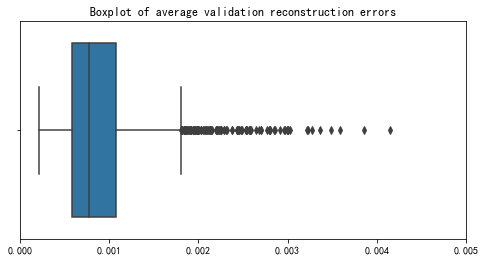

In [241]:
# perform detection

# get validation reconstruction errors
_, validation_errors = pred_error(X2_pre,X2)

# plot distribution of average validation reconstruction errors 
f, ax = plt.subplots(1, figsize = (8,4))
sns.boxplot(validation_errors.mean(axis=1), ax=ax)
ax.set_xlim([0,0.005])
ax.set_title('Boxplot of average validation reconstruction errors')

# set treshold as quantile of average reconstruction error
theta1 = validation_errors.mean(axis = 1).quantile(0.997)
theta2 = validation_errors.mean(axis = 1).quantile(0.996)

Q1_ = validation_errors.mean(axis = 1).quantile(q=0.25)
Q3_ = validation_errors.mean(axis = 1).quantile(q=0.75)
print(Q1_)

print(theta1,theta2)
Yhat3, _ = detect(X3_pre,X3, theta = theta1 , window = 3, average=True)
Yhat4, _ = detect(X4_pre,X4, theta = theta2, window = 3, average=True)

Yhat3_, _1 = detect_(X3_pre,X3, theta_up = theta1, window = 3, average=True)
Yhat4_, _2 = detect_(X4_pre,X4, theta_up = theta2, window = 3, average=True)

In [247]:
data_3 = OutlierDetection(X3)
data_4 = OutlierDetection(X4)
print(data_3)
data_3.to_csv("data_3.csv", encoding='utf-8', index=False)

      L_T1  L_T2  L_T3  L_T4  L_T5  L_T6  L_T7  F_PU1  S_PU1  F_PU2  ...  \
0      NaN   NaN   NaN   NaN   NaN   NaN   NaN    NaN    NaN    NaN  ...   
1      NaN   NaN   NaN   NaN   NaN   NaN   NaN    NaN    NaN    NaN  ...   
2      NaN   NaN   NaN   NaN   NaN   NaN   NaN    NaN    NaN    NaN  ...   
3      NaN   NaN   NaN   NaN   NaN   NaN   NaN    NaN    NaN    NaN  ...   
4      NaN   NaN   NaN   NaN   NaN   NaN   NaN    NaN    NaN    NaN  ...   
...    ...   ...   ...   ...   ...   ...   ...    ...    ...    ...  ...   
4172   NaN   NaN   NaN   NaN   NaN   NaN   NaN    NaN    NaN    NaN  ...   
4173   NaN   NaN   NaN   NaN   NaN   NaN   NaN    NaN    NaN    NaN  ...   
4174   NaN   NaN   NaN   NaN   NaN   NaN   NaN    NaN    NaN    NaN  ...   
4175   NaN   NaN   NaN   NaN   NaN   NaN   NaN    NaN    NaN    NaN  ...   
4176   NaN   NaN   NaN   NaN   NaN   NaN   NaN    NaN    NaN    NaN  ...   

      P_J300  P_J256  P_J289    P_J415  P_J302  P_J306  P_J307    P_J317  \
0        Na

In [159]:
results = pd.DataFrame(index = ['test dataset 01','test dataset 02'], 
                       columns = ['accuracy','f1_score','precision','recall','f2_score'])
results.loc['test dataset 01'] = compute_scores(Y3,Yhat3)
results.loc['test dataset 02'] = compute_scores(Y4,Yhat4)

print('Results:\n')
print(results)

Results:

                 accuracy  f1_score precision    recall  f2_score
test dataset 01  0.943261  0.694981  0.947368   0.54878  0.599201
test dataset 02  0.917664  0.738602  0.968127  0.597052  0.646621


In [209]:
results1 = pd.DataFrame(index = ['test dataset 01','test dataset 02'], 
                       columns = ['accuracy','f1_score','precision','recall','f2_score'])
results1.loc['test dataset 01'] = compute_scores(Y3,Yhat3_)
results1.loc['test dataset 02'] = compute_scores(Y4,Yhat4_)

print('Results1:\n')
print(results1)

Results1:

                 accuracy  f1_score precision    recall  f2_score
test dataset 01  0.945894  0.726392  0.898204  0.609756  0.651607
test dataset 02  0.905697  0.740448  0.798295  0.690418  0.709596


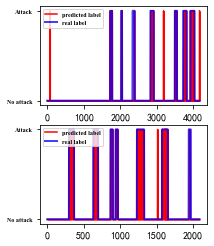

In [67]:
# plot figures
font2 = {'family' : 'Times New Roman',
        'weight' : 'normal',
        'size'   : 10,
            }
font1 = {'family' : 'Times New Roman',
        'weight' : 'normal',
        'size'   : 6,
            }
shade_of_gray = '0.75'
f, axes = plt.subplots(2,figsize = (3,4))
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
axes[0].plot(Yhat3, color = 'r', label = 'predicted label')#shade_of_gray
axes[0].fill_between(Yhat3.index, Yhat3.values, where=Yhat3.values <=1, interpolate=True, color='r')
axes[0].plot(Y3, color = 'b', alpha = 0.75, lw = 2, label = 'real label')
#axes[0].set_title('validation set', font2,loc='left')
#axes[0].set_xlabel('Time/h',font2)
axes[0].set_yticks([0,1])
axes[0].set_yticklabels(['No attack','Attack'],font1)
#axes[0].legend(fontsize = 10, loc = 'upper left', bbox_to_anchor=(1.05,1.0),borderaxespad = 0.)
axes[0].legend(loc='upper left',prop=font1)

axes[1].plot(Yhat4, color = 'r', label = 'predicted label')
axes[1].fill_between(Yhat4.index, Yhat4.values, where=Yhat4.values <=1, interpolate=True, color='r')
axes[1].plot(Y4, color = 'b', alpha = 0.75, lw = 2, label = 'real label')
#axes[1].set_title('test set', font2,loc='left')
#axes[1].set_xlabel('Time/h',font2)
axes[1].set_yticks([0,1])
axes[1].set_yticklabels(['No attack','Attack'],font1)
#axes[1].legend(fontsize = 10, loc = 'upper left', bbox_to_anchor=(1.05,1.0),borderaxespad = 0.)
axes[1].legend(loc='upper left',prop=font1)
plt.savefig("f_SAE.png", dpi=1000, bbox_inches = 'tight')

In [ ]:
cm_plot(Y3,Yhat3)
cm_plot(Y4,Yhat4)

In [58]:
flag_Y3 = cumsum(X3,summ,minn,b,theta1)

KeyError: 0

In [67]:
Flag3 = ad(X3,X3_pre,theta1)

In [68]:
print(Flag3)

True


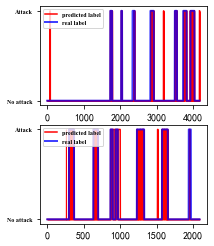

In [195]:
# plot figures
font2 = {'family' : 'Times New Roman',
        'weight' : 'normal',
        'size'   : 10,
            }
font1 = {'family' : 'Times New Roman',
        'weight' : 'normal',
        'size'   : 6,
            }
shade_of_gray = '0.75'
f, axes = plt.subplots(2,figsize = (3,4))
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
axes[0].plot(Yhat3_, color = 'r', label = 'predicted label')#shade_of_gray
axes[0].fill_between(Yhat3.index, Yhat3.values, where=Yhat3.values <=1, interpolate=True, color='r')
axes[0].plot(Y3, color = 'b', alpha = 0.75, lw = 2, label = 'real label')
#axes[0].set_title('validation set', font2,loc='left')
#axes[0].set_xlabel('Time/h',font2)
axes[0].set_yticks([0,1])
axes[0].set_yticklabels(['No attack','Attack'],font1)
#axes[0].legend(fontsize = 10, loc = 'upper left', bbox_to_anchor=(1.05,1.0),borderaxespad = 0.)
axes[0].legend(loc='upper left',prop=font1)

axes[1].plot(Yhat4_, color = 'r', label = 'predicted label')
axes[1].fill_between(Yhat4.index, Yhat4.values, where=Yhat4.values <=1, interpolate=True, color='r')
axes[1].plot(Y4, color = 'b', alpha = 0.75, lw = 2, label = 'real label')
#axes[1].set_title('test set', font2,loc='left')
#axes[1].set_xlabel('Time/h',font2)
axes[1].set_yticks([0,1])
axes[1].set_yticklabels(['No attack','Attack'],font1)
#axes[1].legend(fontsize = 10, loc = 'upper left', bbox_to_anchor=(1.05,1.0),borderaxespad = 0.)
axes[1].legend(loc='upper left',prop=font1)
plt.savefig("f_SAE_.png", dpi=1000, bbox_inches = 'tight')